# Business Understanding:
Traffic on roads of Bangalore is not among the best in cities of India, and a recent study by Ola Cabs have confirmed the same - the average speed of vehicles at peak hours is approx 15.5 KM/hr, which is 3rd from bottom ranking among Indian cities. But there are pockets where traffic moves at high speed as well, parts of city where number of accidents or potential accidents is high, at the same time at other places it is pretty low.

Dataset contains information about collision alerts generated by the Collision Avoidance System (CAS) installed in buses in Bangalore, can be used for various purposes.


In [15]:
# Importing libraries

# Default
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [16]:
# reading the dataset

df = pd.read_csv(r"/content/bangalore-cas-alerts.csv")

In [17]:
# top 5 rows of the data

df.head()

,deviceCode_deviceCode,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_location_wardName,deviceCode_pyld_alarmType,deviceCode_pyld_speed,deviceCode_time_recordedTime_$date
0,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
1,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
2,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
3,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
4,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z


## Let's Understand the data

**Dataset information:**

**Context**

Grey Spot Dataset by Intel contains JSON files on monthly data collected by Collision Avoidance System installed in buses and has mapping of data on imminent collisions in areas in the city of Bangalore.

**Content**

deviceCode - Unique device code for the CAS installed in the vehicles;
latitude - The latitude of the location where the collision warning was generate;

longitude - The longitude of the location where the collision warning was generated;

wardName - The ward in which this location (lat, long) falls under -> BBMP GeoJSON for Bangalore wards have been used to identify the ward based on the lat/long data. alarmType - The type of collision alert generated by the collision avoidance system, following are the types:

Forward Collision Warning (FCW)

Headway/Following Time Monitoring & Warning (HMW)

Lane Departure Warning Left (LDWL)

Lane Departure Warning Right (LDWR)

Speed Limit Indicator (Overspeed)

Pedestrian & Cyclist Collision Warning (PCW)

Urban Forward Collision Warning (FCW)

recordedTime - The time at which the alert was generated; speed - The speed of the vehicle at the time when the collision alert was generated. Values of all the speed are in km/hr. Regarding the alert type over speeding, it generates the alert based on the road signs with actual speed value recorded. There could be anomalies in time synchronization between the alert the speed value, because this value does not come from the collision avoidance system but from the FMS system

#### Before further deep-dive, it is important to understand the types of alarms captured by CAS.

**FORWARD COLLISION WARNINGS (FCW):** A FCW alerts drivers of an imminent rear-end collision with a car, truck, or motorcycle.

**URBAN FORWARD COLLISION WARNINGS (UFCW):** UFCW provides an alert before a possible low-speed collision with the vehicle in front, thus assisting the driver at a low speed in densely heavy traffic. This is usually applicable when driving under approx 30 kmph.

**HEADWAY MONITORING WARNING (HMW):** The headway monitoring warning (HMW) helps drivers maintain a safe following distance from the vehicle ahead of them by providing visual and audible alerts if the distance becomes unsafe. Active above 30 kmph, this sensor generates alarm and displays the amount of time, in seconds, to the vehicle in front when that time becomes 2.5 seconds or less.

**LANE DEPARTURE WARNINGS (LDW):** The LDW provides an alert when the vehicle unintentionally departs from the driving lane without using the turn signals. If the turn signals are used when changing lanes, an alert is not generated. Usually active above 55 kmph, LDW might not work well if lanes are unmarked or poorly marked.
This is further classified into: (a) LDWL, for lane departures towards left lane and (b) LDWR, for the same towards right lane.

**PEDESTRIANS AND CYCLIST DETECTION AND COLLISION WARNING (PCW):** The PCW notifies the driver of a pedestrian or cyclist in the danger zone and alerts drivers of an imminent collision with a pedestrian or cyclist. PCW works well when vehicle is below 50 kmph.

**OVERSPEEDING:** Detects and classifies various visible speed limit signs and provides visual indication when the vehicle’s speed exceeds the posted speed limit.

In [18]:
# shape of the data

df.shape

(18783, 7)

**Observation:**
- Dataset has 132779 records with 7 columns

In [19]:
# columns of the data

df.columns

Index(['deviceCode_deviceCode', 'deviceCode_location_latitude',
       'deviceCode_location_longitude', 'deviceCode_location_wardName',
       'deviceCode_pyld_alarmType', 'deviceCode_pyld_speed',
       'deviceCode_time_recordedTime_$date'],
      dtype='object')

In [20]:
# Data types of the dataset

df.dtypes

deviceCode_deviceCode                   int64
deviceCode_location_latitude          float64
deviceCode_location_longitude         float64
deviceCode_location_wardName           object
deviceCode_pyld_alarmType              object
deviceCode_pyld_speed                   int64
deviceCode_time_recordedTime_$date     object
dtype: object

**Observation:**
- "deviceCode_location_wardName", "deviceCode_pyld_alarmType", "deviceCode_time_recordedTime_$date" columns are of object type and rest all columns are of numeric type.

In [21]:
# Basic information on dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18783 entries, 0 to 18782
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   deviceCode_deviceCode               18783 non-null  int64  
 1   deviceCode_location_latitude        18783 non-null  float64
 2   deviceCode_location_longitude       18783 non-null  float64
 3   deviceCode_location_wardName        18783 non-null  object 
 4   deviceCode_pyld_alarmType           18783 non-null  object 
 5   deviceCode_pyld_speed               18783 non-null  int64  
 6   deviceCode_time_recordedTime_$date  18783 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.0+ MB


**Observation:**
- All columns have constrains not null and there is no null value in the dataset
- Memory usage is 7.1+ MB

In [22]:
# Object type columns

object_cols = [col for col in df.columns if df[col].dtype == "object"]

print('Categorical columns that will be ordinal encoded:', object_cols)

Categorical columns that will be ordinal encoded: ['deviceCode_location_wardName', 'deviceCode_pyld_alarmType', 'deviceCode_time_recordedTime_$date']


In [23]:
# For numerical features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
print('Numerical columns: ',numerical_features)

Numerical columns:  ['deviceCode_deviceCode', 'deviceCode_location_latitude', 'deviceCode_location_longitude', 'deviceCode_pyld_speed']


In [24]:
# Checking nul values

df.isna().sum()

deviceCode_deviceCode                 0
deviceCode_location_latitude          0
deviceCode_location_longitude         0
deviceCode_location_wardName          0
deviceCode_pyld_alarmType             0
deviceCode_pyld_speed                 0
deviceCode_time_recordedTime_$date    0
dtype: int64

**Observation:**

There are 0 missing records in dataset

In [25]:
# Checking duplicate records

df.duplicated().sum()

7334

**Observation:**

There are 23577 duplicate records in dataset

#### Dropping duplicate records

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
# check if duplicate records exists

df.duplicated().sum()

0

**Observation:**
- Duplicate records are removed

In [28]:
# description about dataset

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
deviceCode_deviceCode,11449.0,8.641140e+14,2.446676e+11,8.630830e+14,8.639770e+14,8.639770e+14,8.645040e+14,8.645040e+14
deviceCode_location_latitude,11449.0,1.297143e+01,2.485394e-02,1.288901e+01,1.295580e+01,1.297637e+01,1.298873e+01,1.306994e+01
deviceCode_location_longitude,11449.0,7.772240e+01,2.635851e-02,7.763595e+01,7.769999e+01,7.772794e+01,7.774358e+01,7.780426e+01
deviceCode_pyld_speed,11449.0,2.404804e+01,1.368814e+01,0.000000e+00,1.300000e+01,2.500000e+01,3.400000e+01,7.500000e+01


### Basic Analysis

**"deviceCode_deviceCode"** column

In [29]:
df['deviceCode_deviceCode']

0        864504031502210
2        864504031502210
4        864504031502210
6        864504031502210
8        864504031502210
              ...       
18778    863977033766374
18779    863977033766374
18780    864504031235647
18781    864504031205202
18782    864504031235647
Name: deviceCode_deviceCode, Length: 11449, dtype: int64

In [30]:
df['deviceCode_deviceCode'].value_counts()

863977033764239    2607
863977033888558    1790
864504031502210    1156
863977033715231     755
863977033827523     709
863977033828919     551
864504031035658     546
863977033766374     434
864504031205202     388
864504031819929     323
864504031235647     307
863977033895017     287
863977033835484     274
863977033703997     224
863977033907911     179
863977033713764     157
864504031432707     153
863977033802534     150
863977033828794     136
864504031782226     115
863977033612396      64
863083037582683      58
864504031234988      49
864504031218007      37
Name: deviceCode_deviceCode, dtype: int64

**Observation:**
- There are vehicles with multiple records

**"deviceCode_location_latitude"** column

In [31]:
df['deviceCode_location_latitude']

0        12.984595
2        12.987233
4        12.987503
6        12.987523
8        12.988210
           ...    
18778    12.971305
18779    12.971301
18780    12.964738
18781    12.958435
18782    12.964470
Name: deviceCode_location_latitude, Length: 11449, dtype: float64

In [32]:
df['deviceCode_location_latitude'].min()

12.889007568359377

**Observation:**
- Minimum latitude is 1.68

In [33]:
df['deviceCode_location_latitude'].max()

13.069939613342283

**Observation:**
- Maximum latitude is 13.07

In [34]:
# getting the difference between average and minimum longitude

df.groupby('deviceCode_deviceCode')['deviceCode_location_latitude'].mean().sort_values(ascending=False) - df.groupby('deviceCode_deviceCode')['deviceCode_location_latitude'].min().sort_values(ascending=False)

deviceCode_deviceCode
863083037582683    0.009788
863977033612396    0.021488
863977033703997    0.022730
863977033713764    0.013158
863977033715231    0.017775
863977033764239    0.070930
863977033766374    0.020768
863977033802534    0.013877
863977033827523    0.028033
863977033828794    0.009355
863977033828919    0.042556
863977033835484    0.018430
863977033888558    0.017515
863977033895017    0.036976
863977033907911    0.018959
864504031035658    0.016573
864504031205202    0.020081
864504031218007    0.007159
864504031234988    0.008615
864504031235647    0.009295
864504031432707    0.015312
864504031502210    0.021593
864504031782226    0.006169
864504031819929    0.013614
Name: deviceCode_location_latitude, dtype: float64

**Observation:**
- Latitude differene between mean and lowest of Vehicles are approx equal

**"deviceCode_location_longitude"** feature

In [35]:
df['deviceCode_location_longitude']

0        77.744087
2        77.741119
4        77.740051
6        77.736702
8        77.731369
           ...    
18778    77.745781
18779    77.745789
18780    77.748665
18781    77.746147
18782    77.748589
Name: deviceCode_location_longitude, Length: 11449, dtype: float64

In [36]:
df['deviceCode_location_longitude'].min()

77.63594818115234

**Observation:**
- Minimum ongitude is 77.50

In [37]:
df['deviceCode_location_longitude'].max()

77.80426025390625

**Observation:**
- Maximum ongitude is 77.80

In [38]:
# getting the difference between average and minimum longitude

df.groupby('deviceCode_deviceCode')['deviceCode_location_longitude'].mean().sort_values(ascending=False) - df.groupby('deviceCode_deviceCode')['deviceCode_location_longitude'].min().sort_values(ascending=False)

deviceCode_deviceCode
863083037582683    0.030399
863977033612396    0.012347
863977033703997    0.017338
863977033713764    0.015217
863977033715231    0.064353
863977033764239    0.035377
863977033766374    0.031123
863977033802534    0.016820
863977033827523    0.044727
863977033828794    0.025573
863977033828919    0.058832
863977033835484    0.027751
863977033888558    0.017572
863977033895017    0.013449
863977033907911    0.017889
864504031035658    0.050398
864504031205202    0.062912
864504031218007    0.015404
864504031234988    0.022121
864504031235647    0.032595
864504031432707    0.045498
864504031502210    0.007729
864504031782226    0.014643
864504031819929    0.027626
Name: deviceCode_location_longitude, dtype: float64

**Observation:**
- Vehicles having average longitude while travelling is approximately equal

**'deviceCode_location_wardName'** feature

In [39]:
df['deviceCode_location_wardName']

0                Kadugodi
2        Garudachar Playa
4                    Hudi
6                Kadugodi
8                    Hudi
               ...       
18778             Hagadur
18779             Hagadur
18780             Hagadur
18781             Hagadur
18782             Hagadur
Name: deviceCode_location_wardName, Length: 11449, dtype: object

In [40]:
# getting the unique values in the column

df['deviceCode_location_wardName'].nunique()

23

**Observation:**
- There are 50 unique word locations

**"deviceCode_pyld_alarmType"** column

In [41]:
df['deviceCode_pyld_alarmType']

0              PCW
2              FCW
4        Overspeed
6              HMW
8        Overspeed
           ...    
18778         UFCW
18779         UFCW
18780          FCW
18781          HMW
18782    Overspeed
Name: deviceCode_pyld_alarmType, Length: 11449, dtype: object

In [42]:
# getting the unique values in the column

df['deviceCode_pyld_alarmType'].nunique()

7

**Observation:**
- There are 7 types of alerts get generated

In [43]:
# Most alerts getting area and different types of alerts

df.groupby('deviceCode_location_wardName')['deviceCode_pyld_alarmType'].value_counts().sort_values(ascending=False).head(50)

deviceCode_location_wardName  deviceCode_pyld_alarmType
Hudi                          Overspeed                    895
Kadugodi                      UFCW                         837
Bellanduru                    HMW                          770
Hagadur                       UFCW                         620
Bellanduru                    UFCW                         545
                              Overspeed                    541
Kadugodi                      Overspeed                    488
Hudi                          UFCW                         463
Kadugodi                      FCW                          407
Dodda Nekkundi                UFCW                         362
Kadugodi                      HMW                          358
                              PCW                          331
Hudi                          HMW                          327
Bellanduru                    FCW                          265
Hagadur                       HMW                          246

**"deviceCode_pyld_speed"** column

In [44]:
df['deviceCode_pyld_speed']

0        32
2        41
4        37
6        32
8        27
         ..
18778     0
18779     1
18780    35
18781    30
18782    21
Name: deviceCode_pyld_speed, Length: 11449, dtype: int64

In [45]:
df['deviceCode_pyld_speed'].min()

0

In [46]:
df['deviceCode_pyld_speed'].max()

75

In [47]:
# Alert getting area with lowest speed

df.groupby('deviceCode_location_wardName')['deviceCode_pyld_speed'].min().sort_values(ascending=True).head(50)

deviceCode_location_wardName
Vijnana Nagar         0
Bellanduru            0
Other                 0
C V Raman Nagar       0
Devasandra            0
Dodda Nekkundi        0
Marathahalli          0
Garudachar Playa      0
HAL Airport           0
Konena Agrahara       0
Hagadur               0
Varthuru              0
Hudi                  0
Kadugodi              0
A Narayanapura        1
Domlur                3
New Tippasandara      3
Benniganahalli        3
Jogupalya             3
HSR Layout            4
Hoysala Nagar         6
Singasandra          31
Jeevanbhima Nagar    33
Name: deviceCode_pyld_speed, dtype: int64

**Observation:**
- Vehicles iIn "Yelchenahalli" driven fast
- Reading generated from vehicles in "A Narayanapura", "Hoysala Nagar" etc at speed 0.
- Hence we can conclude there may be fault in system or there are crashes during vahicles parked

In [48]:
# Alerts getting area with highest speed

df.groupby('deviceCode_location_wardName')['deviceCode_pyld_speed'].max().sort_values(ascending=True).head(50)

deviceCode_location_wardName
Jogupalya            29
New Tippasandara     32
Jeevanbhima Nagar    33
Hoysala Nagar        38
Benniganahalli       38
HSR Layout           41
A Narayanapura       41
C V Raman Nagar      43
Singasandra          43
Vijnana Nagar        45
Devasandra           49
Garudachar Playa     57
Kadugodi             58
Hudi                 60
HAL Airport          61
Marathahalli         61
Domlur               62
Hagadur              63
Konena Agrahara      63
Dodda Nekkundi       65
Varthuru             66
Bellanduru           73
Other                75
Name: deviceCode_pyld_speed, dtype: int64

**Observation:**
- Vehicles in "Varthuru", "Dodda Nekkundi", "Bellanduru" areas used to drivn fast

**"deviceCode_time_recordedTime_$date"** column

In [49]:
df['deviceCode_time_recordedTime_$date']

0        2018-02-01T01:48:59.000Z
2        2018-02-01T01:50:00.000Z
4        2018-02-01T01:50:11.000Z
6        2018-02-01T01:50:50.000Z
8        2018-02-01T01:52:26.000Z
                   ...           
18778    2018-03-05T06:46:48.000Z
18779    2018-03-05T06:46:51.000Z
18780    2018-03-05T06:47:21.000Z
18781    2018-03-05T06:47:23.000Z
18782    2018-03-05T06:47:25.000Z
Name: deviceCode_time_recordedTime_$date, Length: 11449, dtype: object

In [50]:
# applying to time zone for further operations

df.RecordedDateTime = df['deviceCode_time_recordedTime_$date'].map(lambda x : pd.Timestamp(x, tz='Asia/Kolkata'))

In [51]:
# getting separate data

df['Month'] = df.RecordedDateTime.dt.month_name()
df['Year'] = df.RecordedDateTime.dt.year
df['Date'] = df.RecordedDateTime.dt.day
df['Weekday'] = df.RecordedDateTime.dt.day_name()

In [52]:
# getting unique values

df.Month.unique()

array(['February', 'March'], dtype=object)

In [53]:
# getting unique values

df.Year.unique()

array([2018])

In [54]:
# getting unique values

df.Date.unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 12, 14, 15, 16, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28])

In [55]:
# storing hour data

df['Hour'] = df.RecordedDateTime.dt.hour

In [56]:
# getting unique values

df.Hour.unique()

array([ 7, 12, 14, 15, 13,  8,  6, 16, 10,  9, 17, 11])

In [57]:
# Most alerts getting area and different timings of alerts

df.groupby('deviceCode_location_wardName')['Hour'].value_counts().sort_values(ascending=False).head(50)

deviceCode_location_wardName  Hour
Hudi                          7       1258
Kadugodi                      7        972
                              15       575
Garudachar Playa              7        441
Hudi                          15       441
Kadugodi                      14       385
Hagadur                       15       384
Bellanduru                    13       365
                              14       356
                              16       333
Dodda Nekkundi                15       305
Hagadur                       7        278
Other                         15       254
Dodda Nekkundi                7        235
Bellanduru                    12       207
                              7        198
                              11       178
                              9        173
                              15       170
                              17       167
Kadugodi                      12       164
Garudachar Playa              15       159
Hagadur            

## EDA
**Univariate Analysis**

**"deviceCode_deviceCode"** column

<Axes: xlabel='deviceCode_deviceCode', ylabel='Density'>

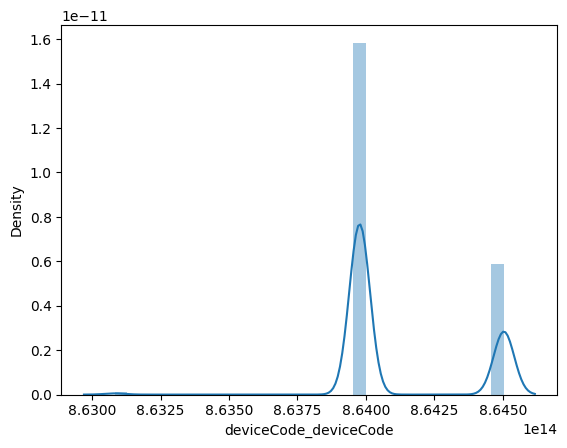

In [58]:
# distplot

sns.distplot(df['deviceCode_deviceCode'])

<Axes: xlabel='deviceCode_deviceCode', ylabel='Density'>

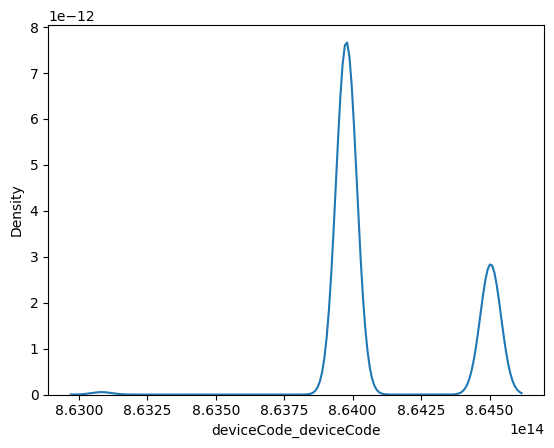

In [59]:
# kde plot

sns.kdeplot(df['deviceCode_deviceCode'])

**Observation:**

- Most of the data in this feature are gathered towards the right of the distribution.

<Axes: >

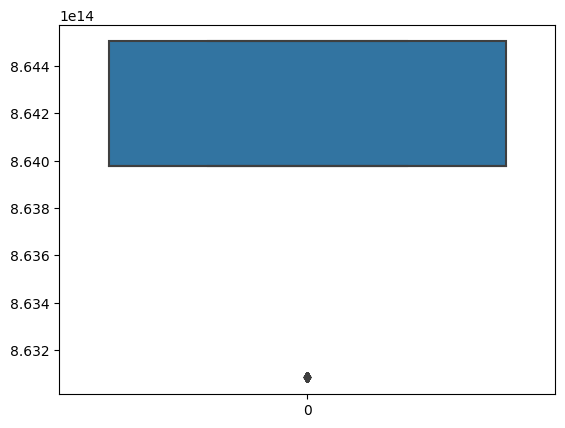

In [60]:
# boxplot

sns.boxplot(df['deviceCode_deviceCode'])

**Observation:**

- There are outliers in the lower side of the distribution.

**"deviceCode_location_latitude"** column

<Axes: xlabel='deviceCode_location_latitude', ylabel='Density'>

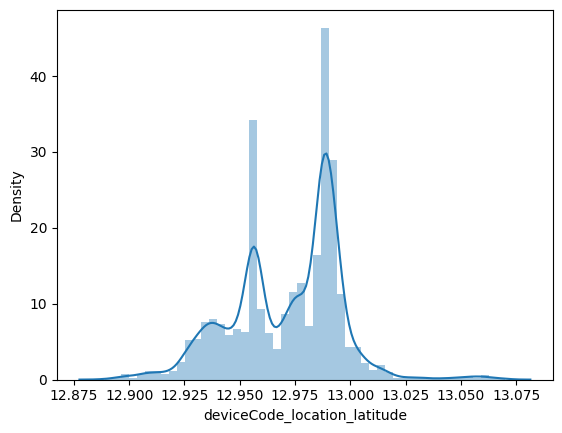

In [61]:
# distplot

sns.distplot(df['deviceCode_location_latitude'])

<Axes: xlabel='deviceCode_location_latitude', ylabel='Density'>

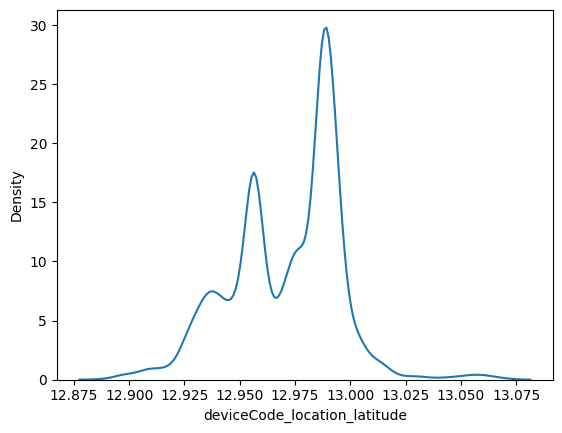

In [62]:
# kde plot

sns.kdeplot(df['deviceCode_location_latitude'])

**Observation:**

- There "deviceCode_location_latitude" column is left skewed distributed

Text(0.5, 0, 'deviceCode_location_latitude')

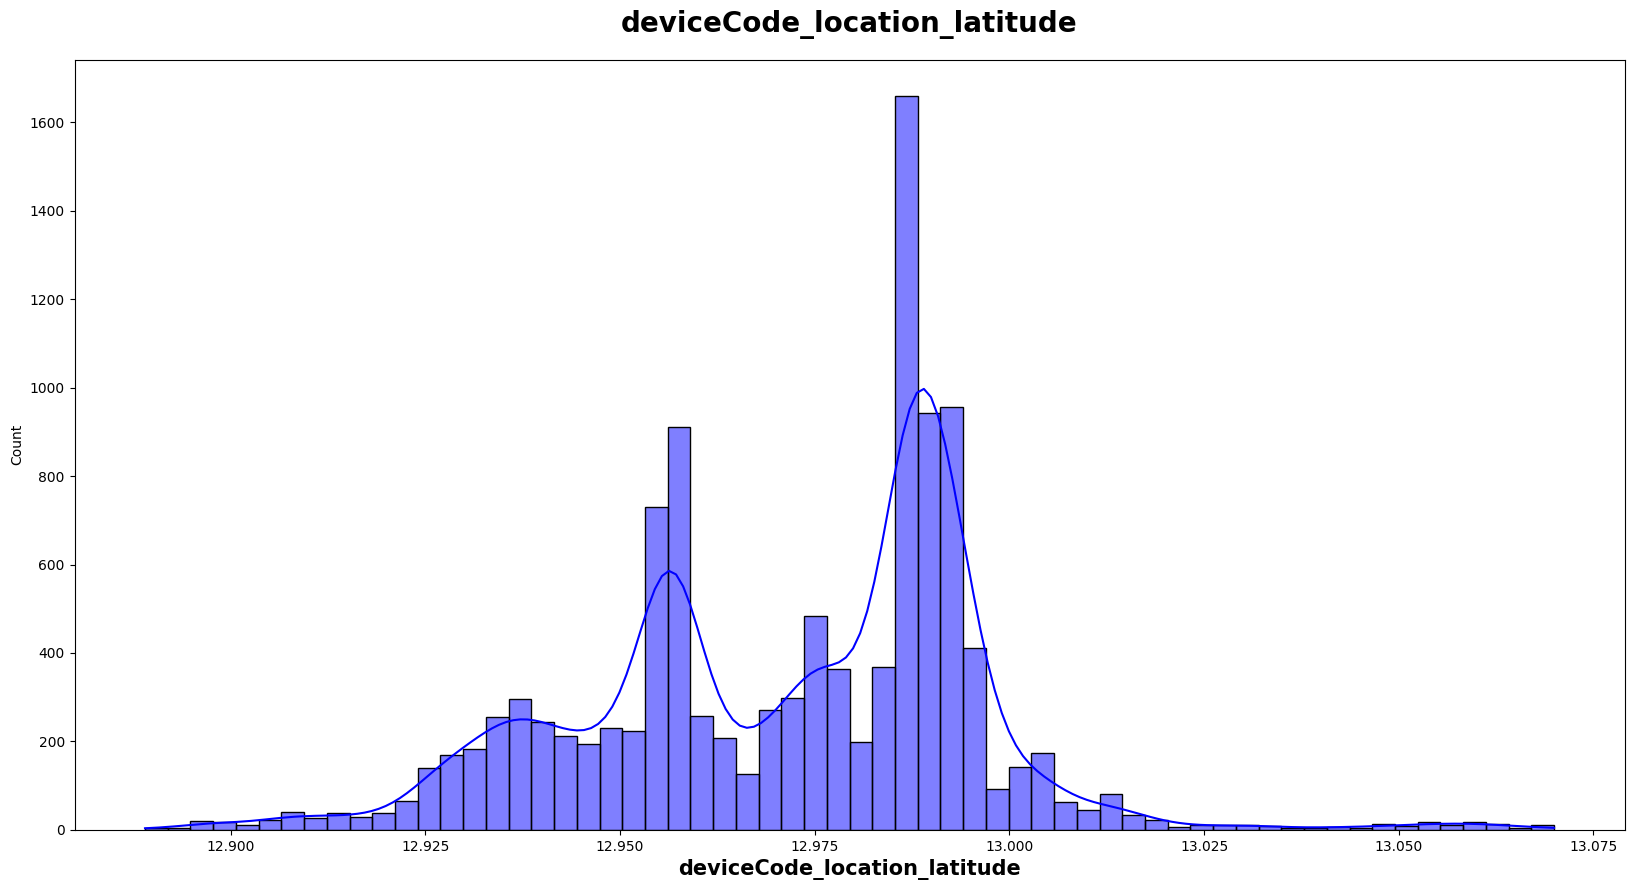

In [63]:
# histogram

plt.subplots(figsize=(20,10))
sns.histplot("deviceCode_location_latitude", x=df.deviceCode_location_latitude, color='b', kde=True)
plt.title("deviceCode_location_latitude", weight='bold', fontsize=20, pad=20)
plt.xlabel('deviceCode_location_latitude', weight='bold', fontsize=15)

**Observation:**

- Most of the data ranges between 12.90 - 13.05

<Axes: >

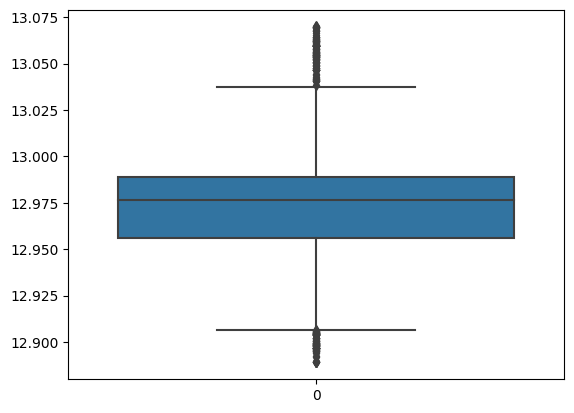

In [64]:
# boxplot

sns.boxplot(df['deviceCode_location_latitude'])

**Observation:**

- There "deviceCode_location_latitude" column has more outliers in the lower side of the distribution

**"deviceCode_location_longitude"** feature

<Axes: xlabel='deviceCode_location_longitude', ylabel='Density'>

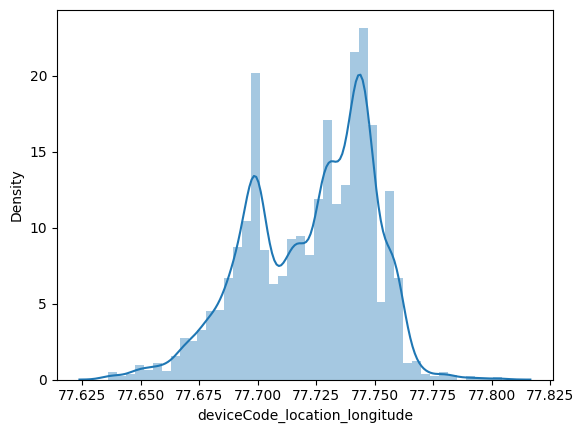

In [65]:
# distplot

sns.distplot(df['deviceCode_location_longitude'])

**Observation:**

- There "deviceCode_location_longitude" column is left skewed distributed

Text(0.5, 0, 'deviceCode_location_longitude')

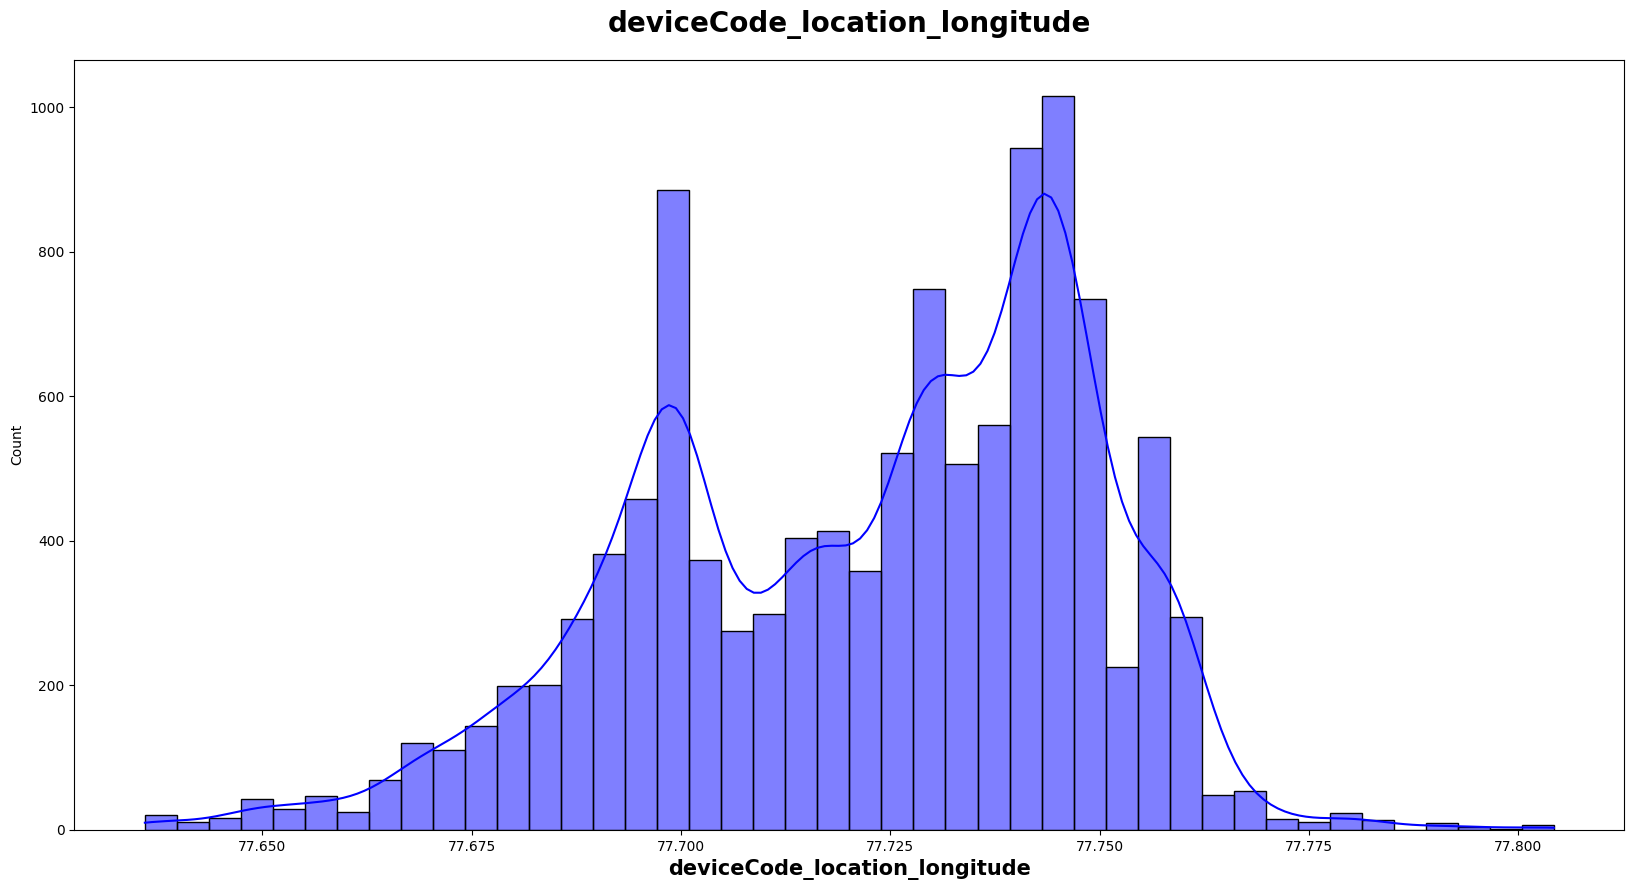

In [66]:
# histogram

plt.subplots(figsize=(20,10))
sns.histplot("deviceCode_location_longitude", x=df.deviceCode_location_longitude, color='b', kde=True)
plt.title("deviceCode_location_longitude", weight='bold', fontsize=20, pad=20)
plt.xlabel('deviceCode_location_longitude', weight='bold', fontsize=15)

**Observation:**

- Most of the data ranges between 77.65 - 77.80

<Axes: >

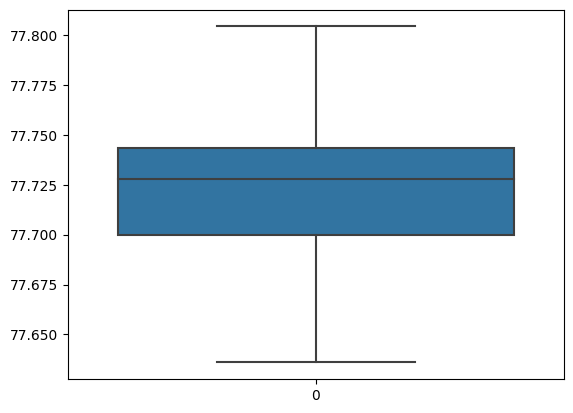

In [67]:
# boxplot

sns.boxplot(df['deviceCode_location_longitude'])

**Observation:**

- There "deviceCode_location_longitude" column has more outliers in the lower side of the distribution

**'deviceCode_location_wardName'** feature

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Kadugodi'),
  Text(1, 0, 'Garudachar Playa'),
  Text(2, 0, 'Hudi'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Devasandra'),
  Text(5, 0, 'Hagadur'),
  Text(6, 0, 'Bellanduru'),
  Text(7, 0, 'Marathahalli'),
  Text(8, 0, 'Dodda Nekkundi'),
  Text(9, 0, 'Varthuru'),
  Text(10, 0, 'HAL Airport'),
  Text(11, 0, 'Vijnana Nagar'),
  Text(12, 0, 'Konena Agrahara'),
  Text(13, 0, 'A Narayanapura'),
  Text(14, 0, 'C V Raman Nagar'),
  Text(15, 0, 'Jeevanbhima Nagar'),
  Text(16, 0, 'HSR Layout'),
  Text(17, 0, 'Domlur'),
  Text(18, 0, 'Jogupalya'),
  Text(19, 0, 'Hoysala Nagar'),
  Text(20, 0, 'New Tippasandara'),
  Text(21, 0, 'Benniganahalli'),
  Text(22, 0, 'Singasandra')])

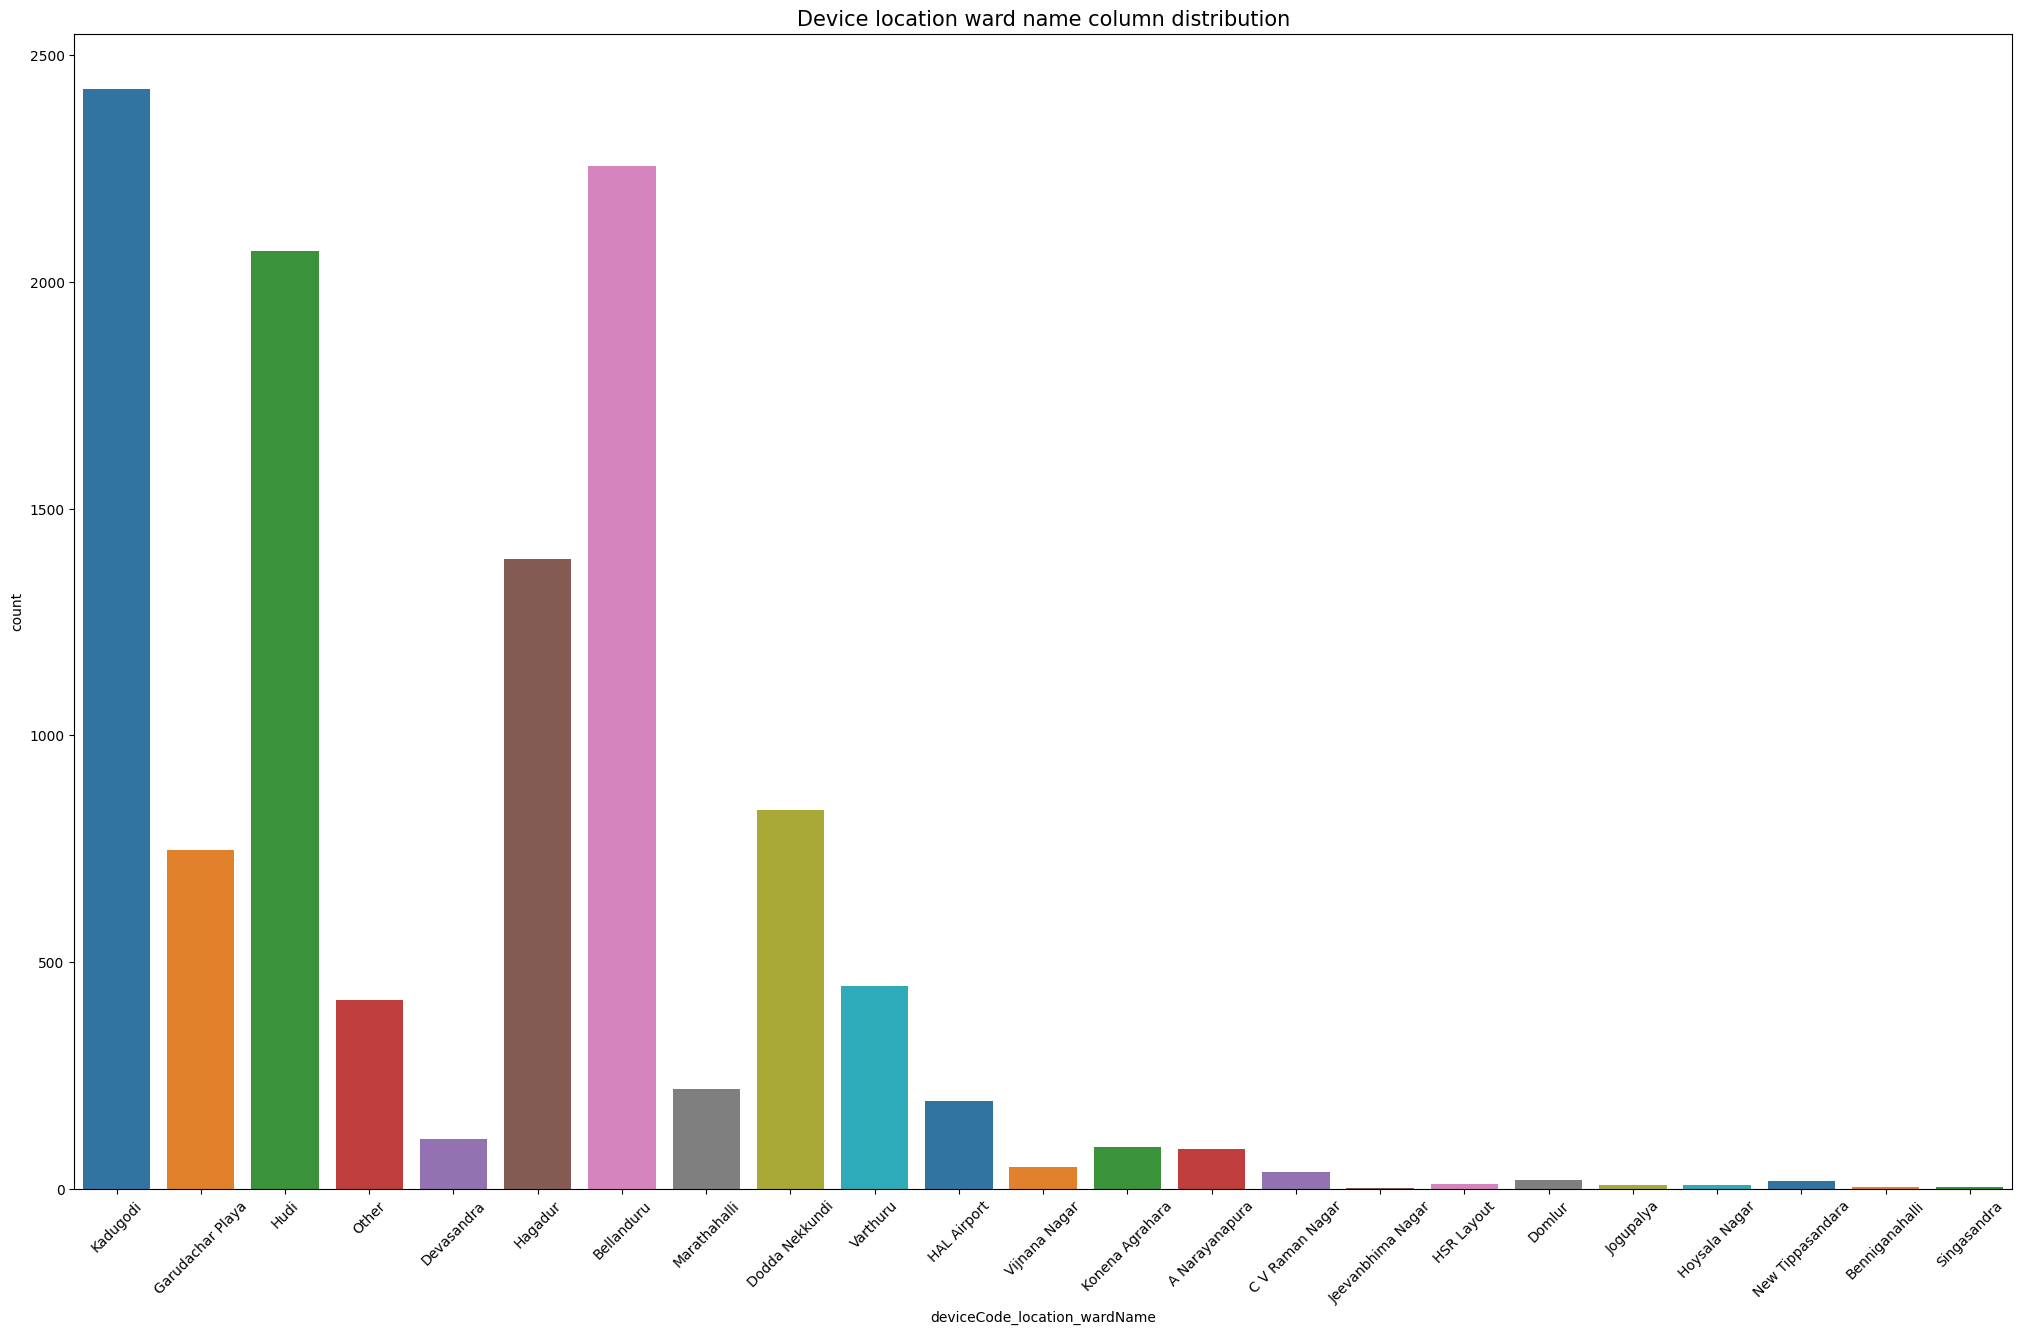

In [68]:
# countplot

plt.figure(figsize=(25,15))
sns.countplot(x='deviceCode_location_wardName', palette="tab10", data=df)
plt.title("Device location ward name column distribution", fontsize=15)
plt.xticks(rotation=45)

**Observation:**

- "Other" locations have most number of collision alerts considering latitude and longitude

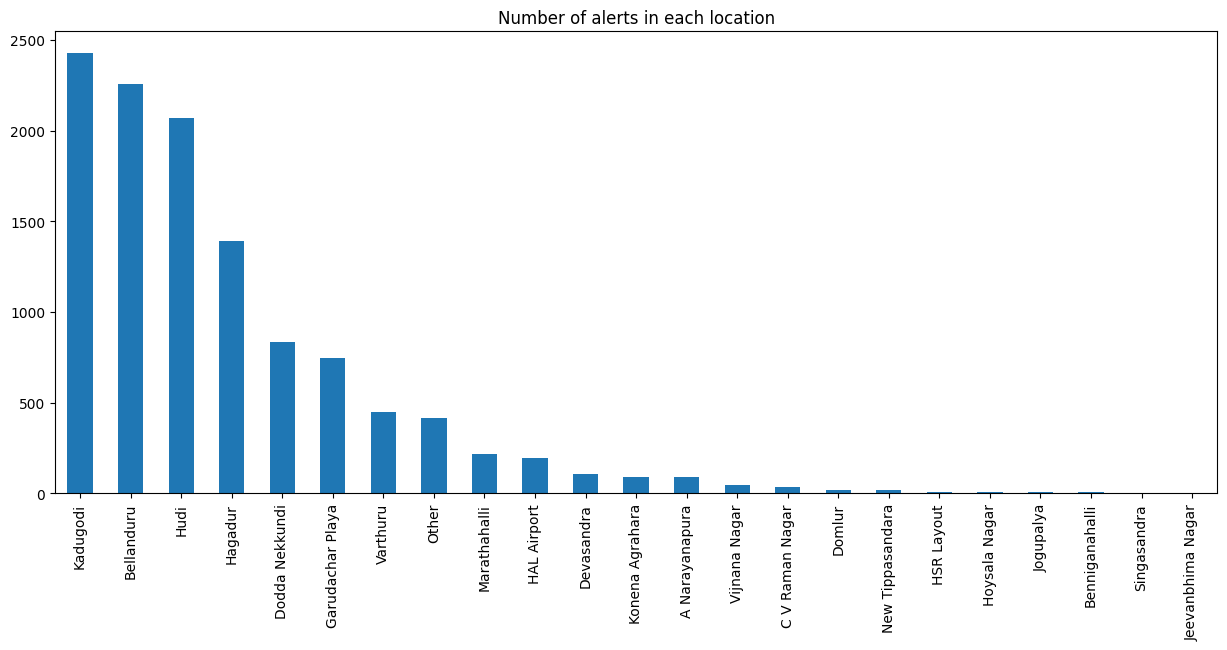

In [69]:
# barplot

plt.figure(figsize=[15,6])
df.deviceCode_location_wardName.value_counts().plot(kind='bar')
plt.title('Number of alerts in each location')
plt.show()

- "Kadugodi" location has most number of collision (considering a specific location)
- We can conclude 'Bellanduru', 'Kadugodi', 'Hudi' locations have more traffic area and the road is narrow as per requirement

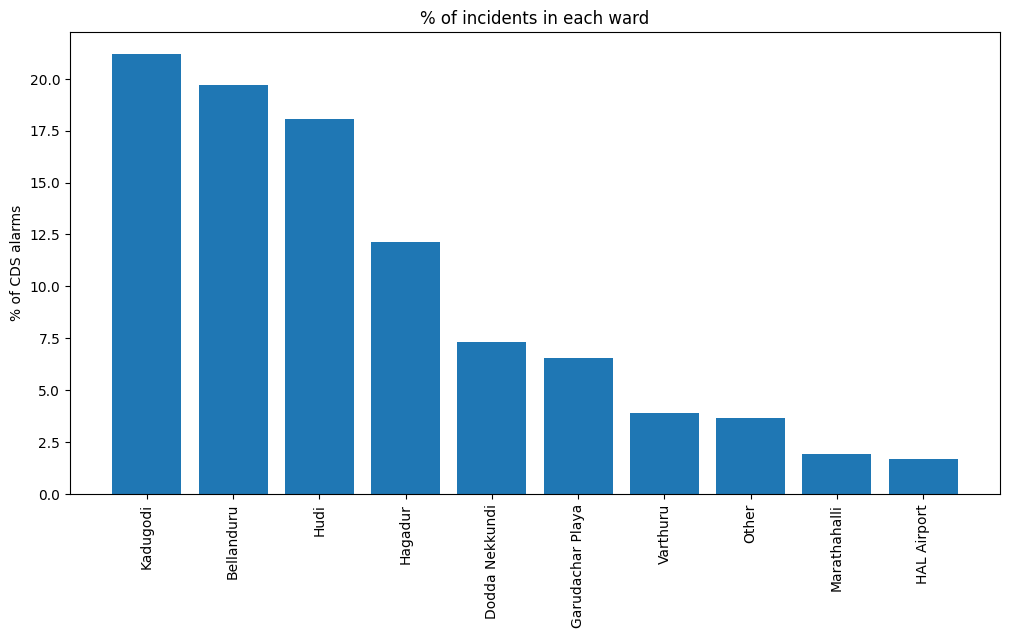

In [70]:
# barchart

fig, axes = plt.subplots(figsize=(12,6))
data = df['deviceCode_location_wardName'].value_counts(normalize=True).sort_values(ascending=False)
data = data.head(10)
axes.bar(data.index, data*100)
axes.set_ylabel("% of CDS alarms")
axes.set_xticklabels(data.index, rotation=90)
axes.set_title("% of incidents in each ward")
plt.show()

**Observation:**

- In percentage comparision "HAL Airport" area has low collision rates

Text(0.5, 1.0, 'Most Dangerous Wards')

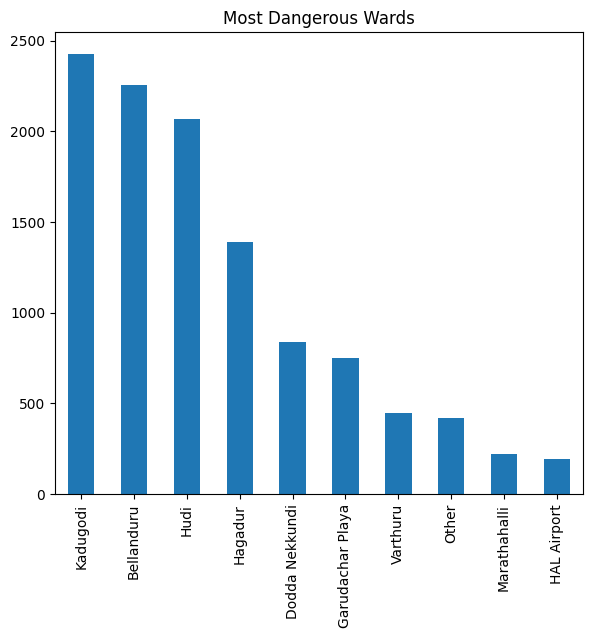

In [71]:
# barplot

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
df.deviceCode_location_wardName.value_counts().head(10).plot(kind='bar')
plt.title('Most Dangerous Wards')

**Observation:**

- Above is accident prone areas

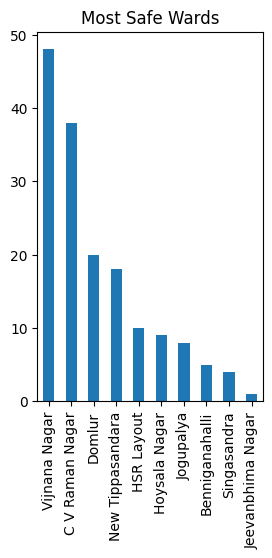

In [72]:
# barplot

plt.subplot(1,2,2)
df.deviceCode_location_wardName.value_counts().tail(10).plot(kind='bar')
plt.title('Most Safe Wards')
plt.show()

**Observation:**

- Above is accident less prone areas
- "JP Nagar" location is most safest area for driving

**"deviceCode_pyld_alarmType"** column

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'PCW'),
  Text(1, 0, 'FCW'),
  Text(2, 0, 'Overspeed'),
  Text(3, 0, 'HMW'),
  Text(4, 0, 'UFCW'),
  Text(5, 0, 'LDWL'),
  Text(6, 0, 'LDWR')])

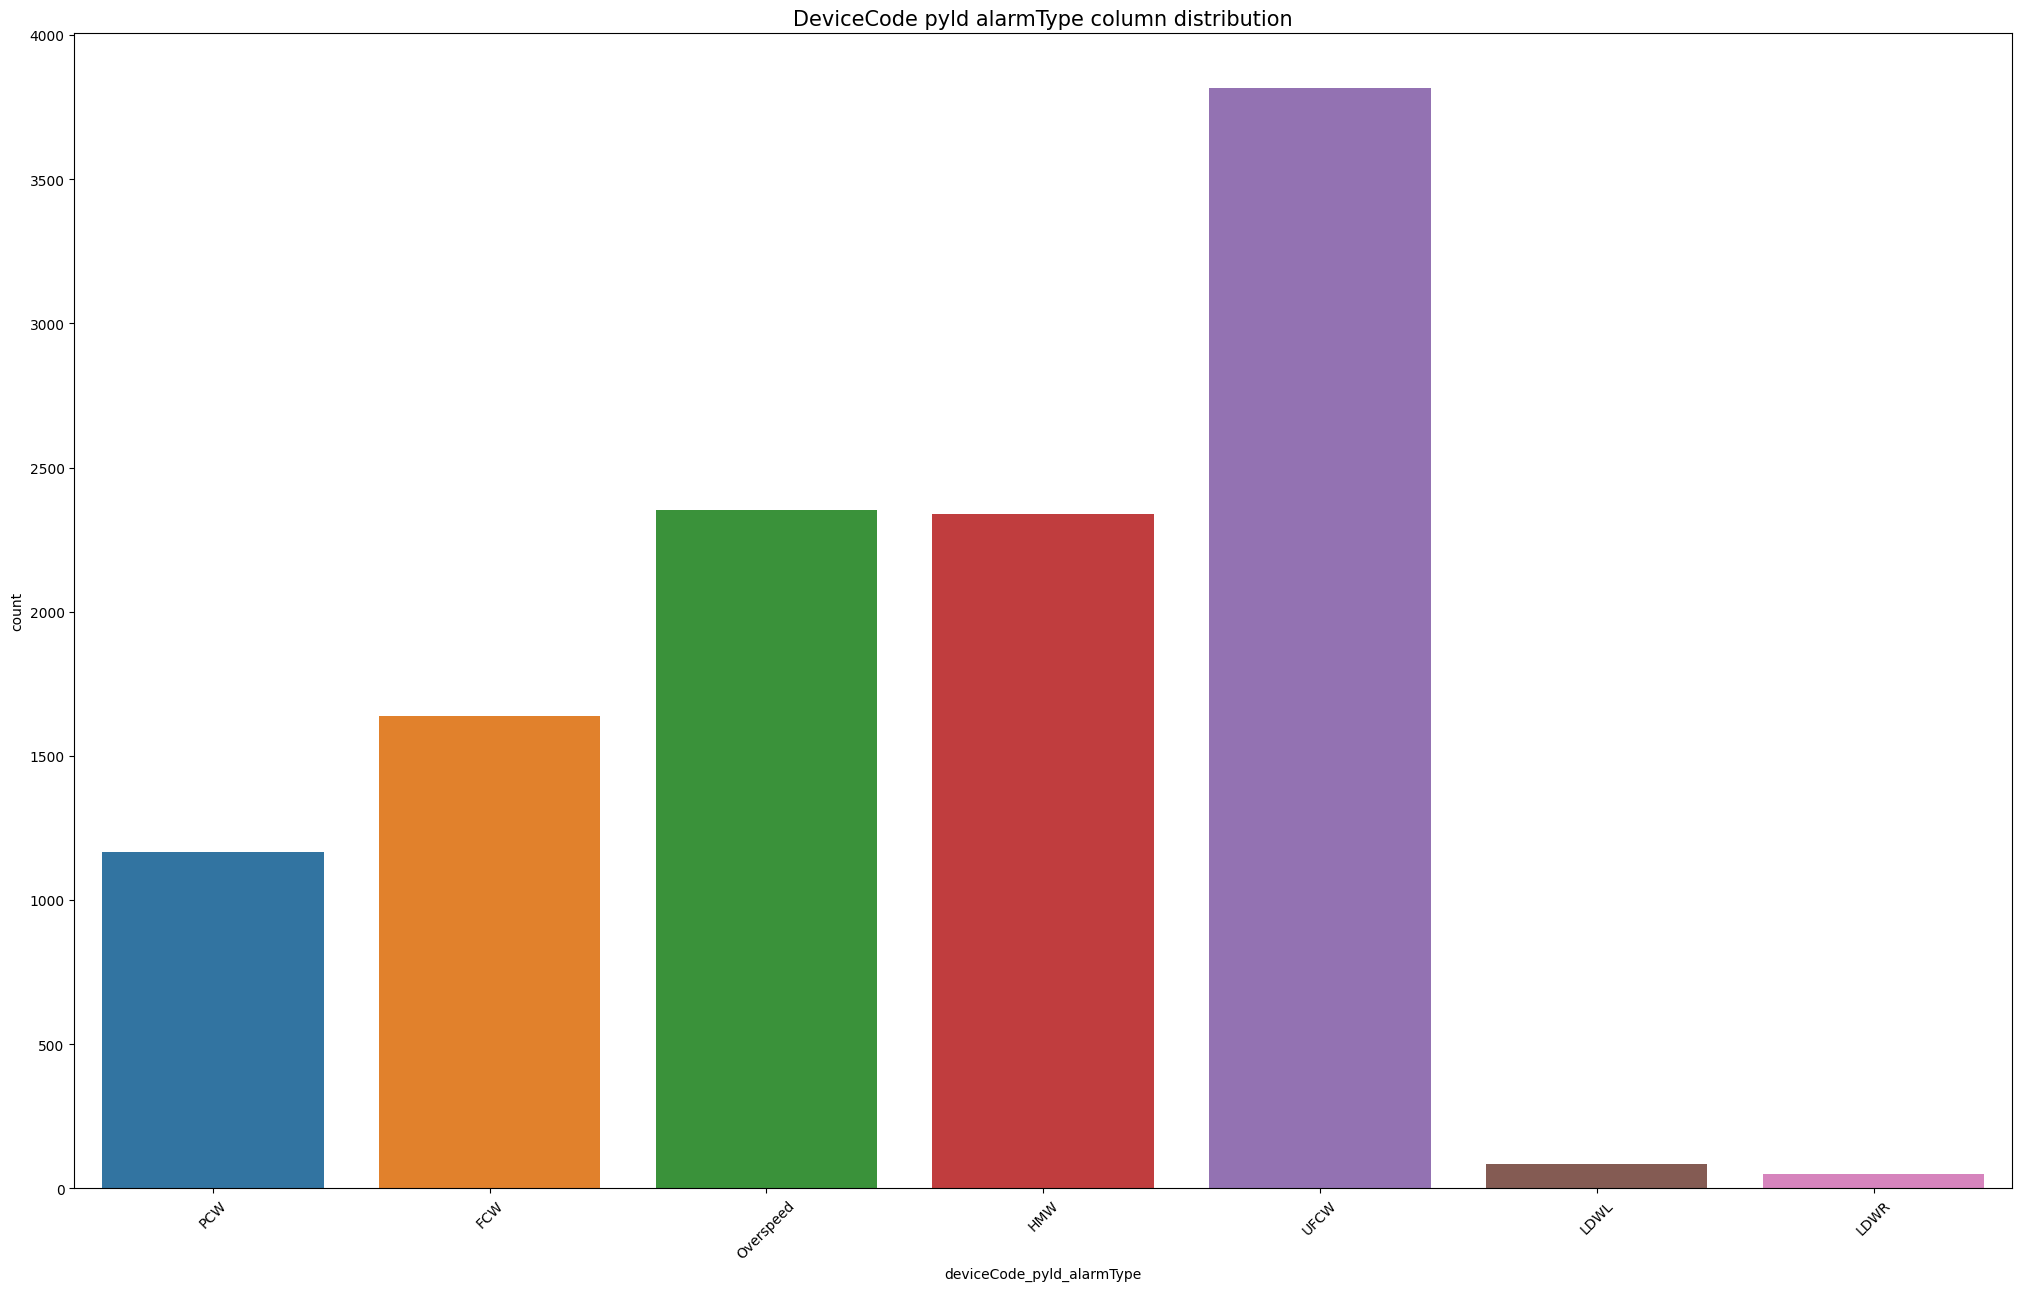

In [73]:
# countplot

plt.figure(figsize=(25,15))
sns.countplot(x='deviceCode_pyld_alarmType', palette="tab10", data=df)
plt.title("DeviceCode pyld alarmType column distribution", fontsize=15)
plt.xticks(rotation=45)

**Observation:**

- "UFCW" type collision is the most
- "LDWL" and "LDWR" type are least type collision

Text(0.5, 1.0, 'Feature name : deviceCode_pyld_alarmType')

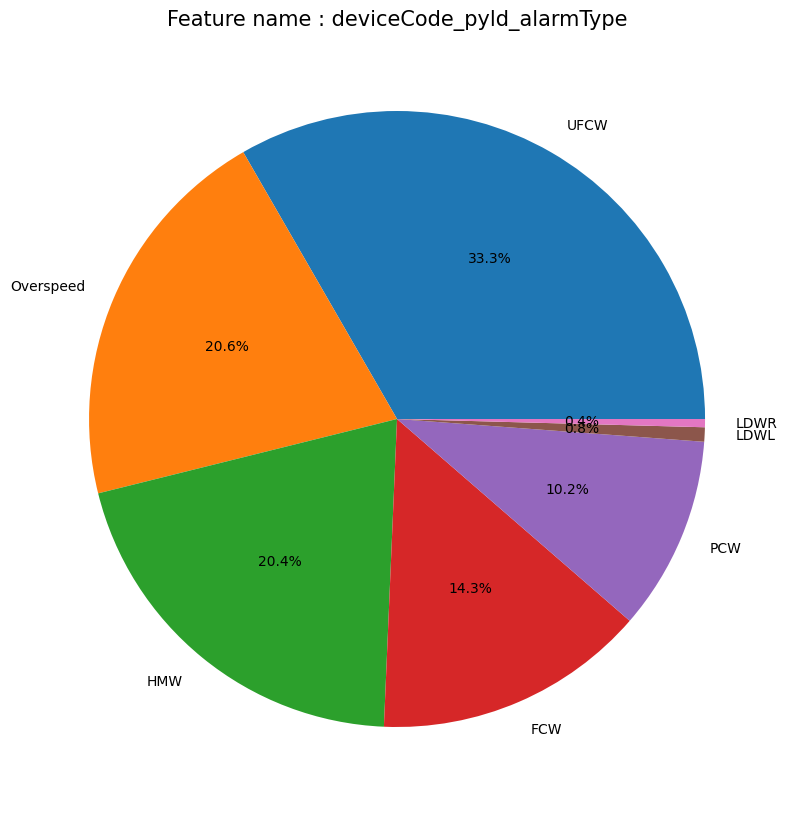

In [74]:
# pie chart

plt.figure(figsize=(20,10))
df.value_counts('deviceCode_pyld_alarmType').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : deviceCode_pyld_alarmType", fontsize = 15)

**"deviceCode_pyld_speed"** column

Text(0.5, 0, 'deviceCode_pyld_speed')

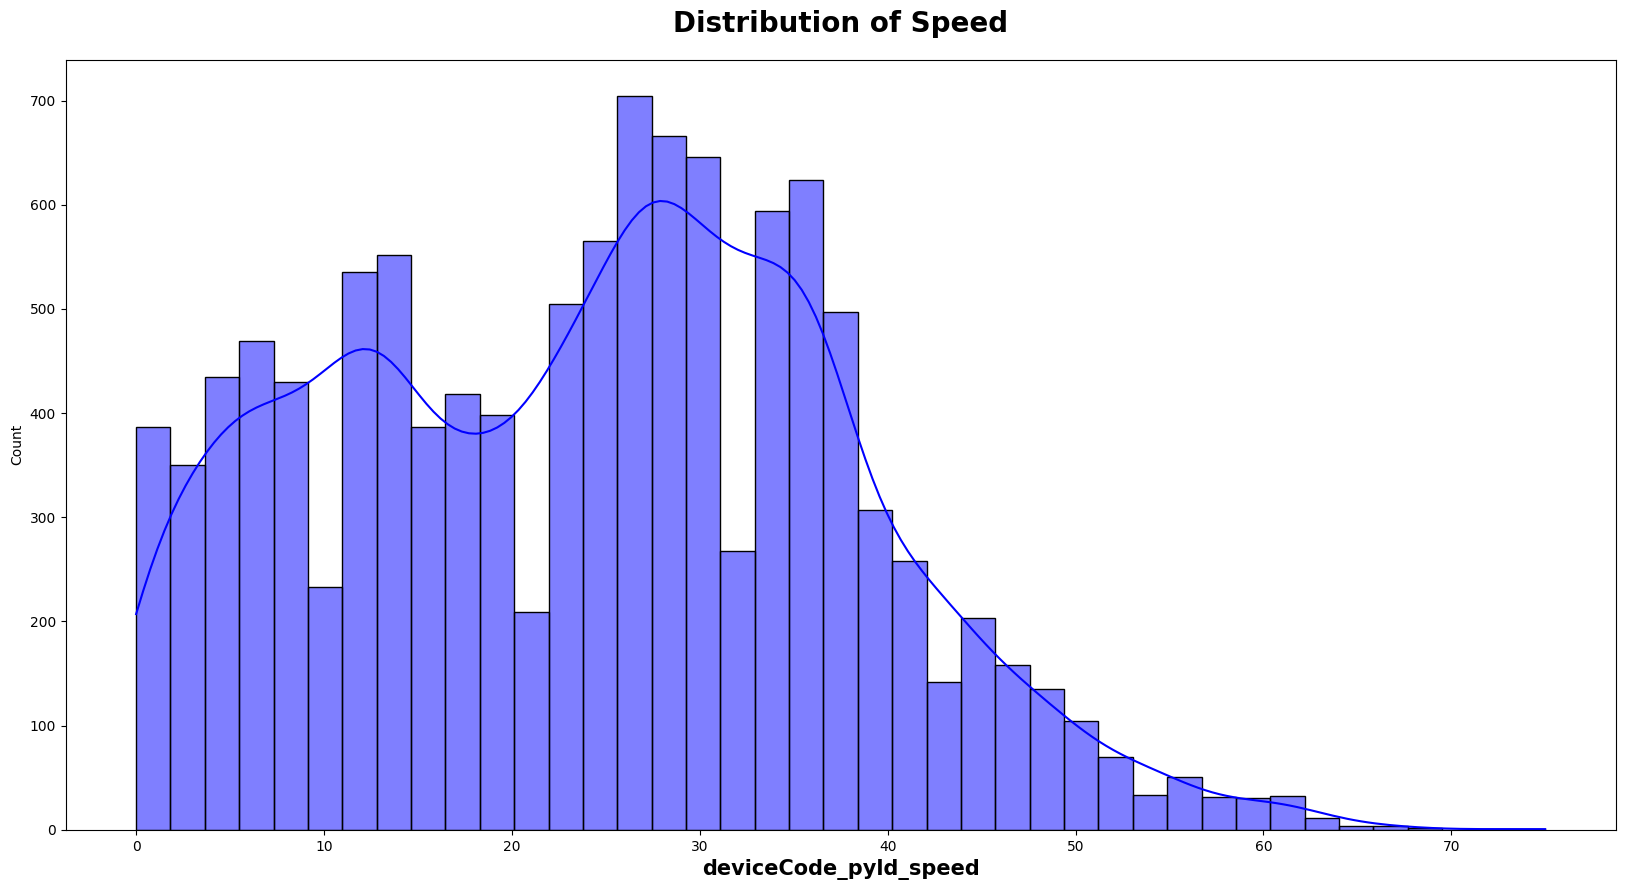

In [75]:
# distplot

#sns.distplot(df['deviceCode_pyld_speed'])

plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Speed", x=df.deviceCode_pyld_speed, color='b', kde=True)
plt.title("Distribution of Speed", weight='bold', fontsize=20, pad=20)
plt.xlabel('deviceCode_pyld_speed', weight='bold', fontsize=15)

**Observation:**

- "deviceCode_pyld_speed" is near to right skewed distributed

<Axes: xlabel='deviceCode_pyld_speed', ylabel='Density'>

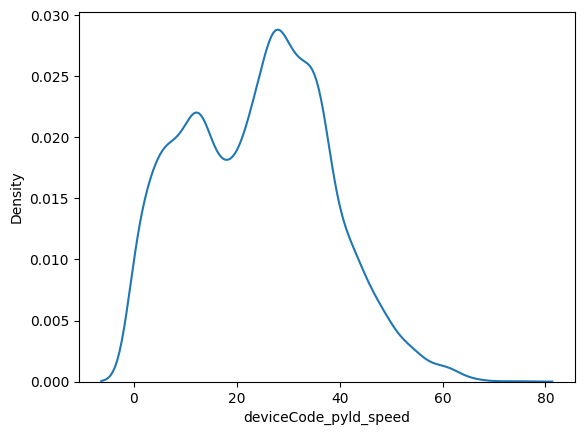

In [76]:
# kde plot

sns.kdeplot(df['deviceCode_pyld_speed'])

<Axes: >

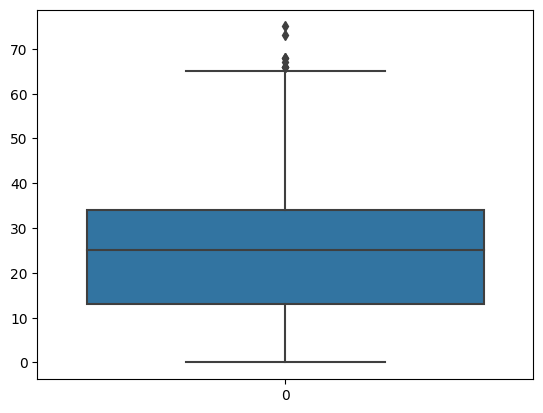

In [77]:
# boxplot

sns.boxplot(df['deviceCode_pyld_speed'])

**Observation:**

- "deviceCode_pyld_speed" has outliers in highrer side of distribution

**"deviceCode_time_recordedTime_$date"** column

In [78]:
df['deviceCode_time_recordedTime_$date'].value_counts()

2018-03-05T02:08:12.000Z    4
2018-03-01T02:15:52.000Z    4
2018-03-01T02:10:14.000Z    3
2018-03-05T02:02:58.000Z    3
2018-03-01T02:13:15.000Z    3
                           ..
2018-02-21T01:59:36.000Z    1
2018-02-21T02:00:35.000Z    1
2018-02-21T02:01:37.000Z    1
2018-02-21T02:01:49.000Z    1
2018-03-05T06:47:25.000Z    1
Name: deviceCode_time_recordedTime_$date, Length: 10816, dtype: int64

**"Month"** feature

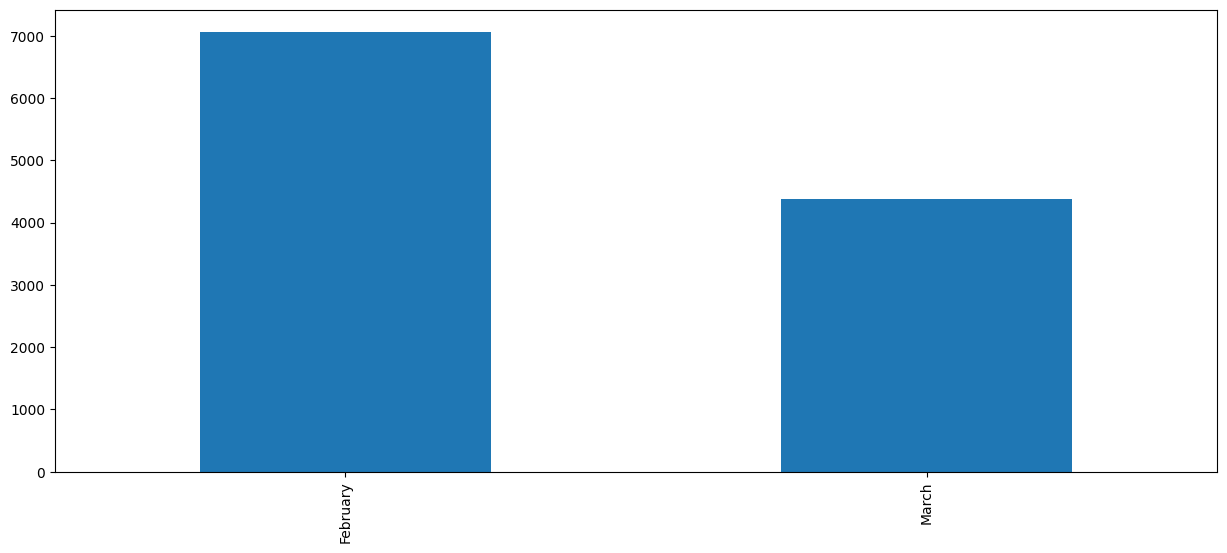

In [79]:
plt.figure(figsize=[15,6])
df.Month.value_counts().plot(kind='bar')
plt.show()


**Observation:**
- Most alerts generated on the month of March and June

**"Weekday"** feature

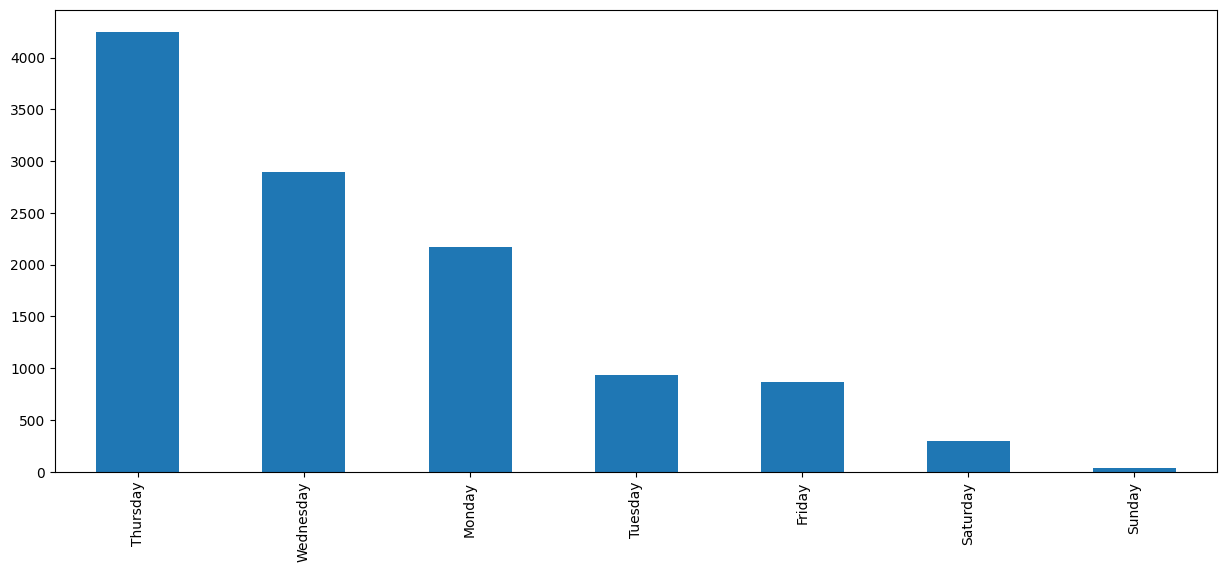

In [80]:
plt.figure(figsize=[15,6])
df.Weekday.value_counts().plot(kind='bar')
plt.show()

**Observation:**
- On weekdays people drive rushing.

**"Hour"** column

In [81]:
hr = df.Hour.value_counts().sort_index()
hr.index

Int64Index([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')

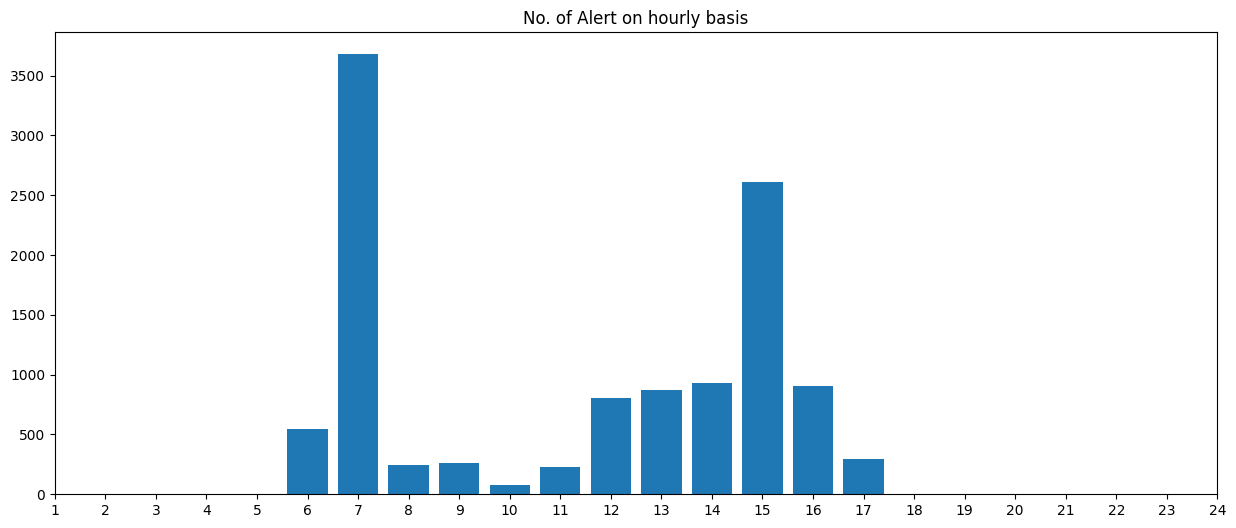

In [82]:
plt.figure(figsize=[15,6])
plt.bar(hr.index, hr.values)
plt.xticks(np.arange(1,25))
plt.title('No. of Alert on hourly basis')
plt.show()

**Observation:**
- Everyday on the official hours people used to dric=ve rush

### Bi-variate analysis

**"deviceCode_location_latitude"** and **"deviceCode_location_longitude"**

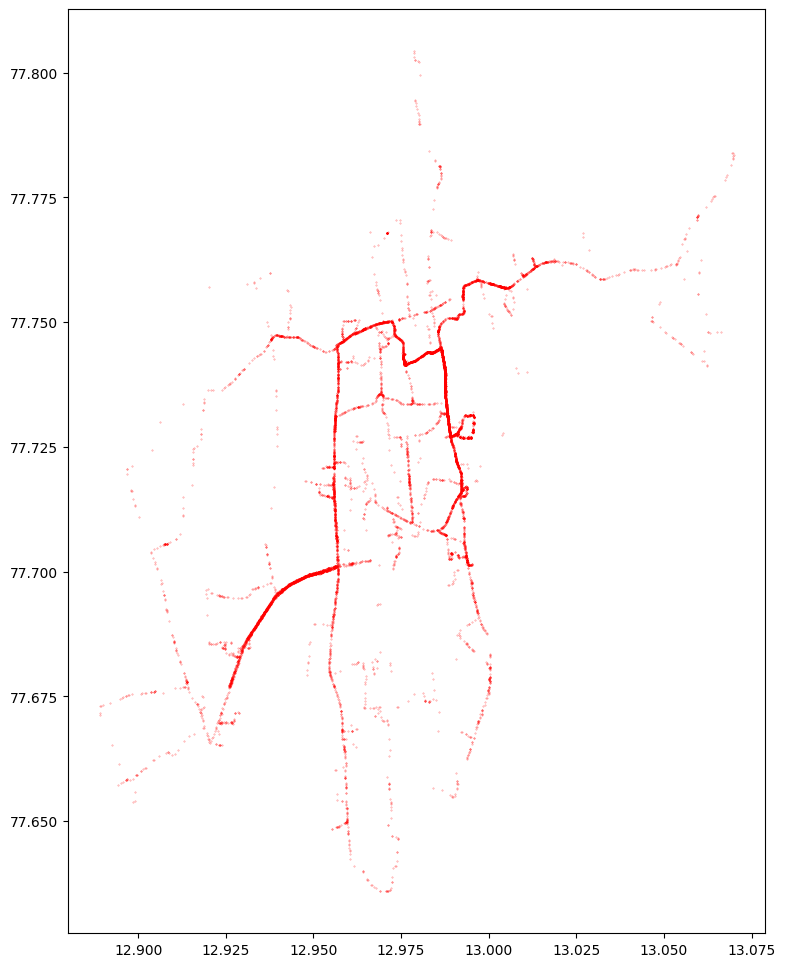

In [83]:
# scatter plot

fig, axes = plt.subplots(figsize=(9,12))
axes.scatter(df.deviceCode_location_latitude, df.deviceCode_location_longitude, s=0.1, alpha=0.5, c='r')
plt.show()

**Observation:**
- We observed the geographical location on traffic alerts

In [89]:
df

,deviceCode_deviceCode,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_location_wardName,deviceCode_pyld_alarmType,deviceCode_pyld_speed,deviceCode_time_recordedTime_$date,Month,Year,Date,Weekday,Hour
0,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z,February,2018,1,Thursday,7
2,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z,February,2018,1,Thursday,7
4,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z,February,2018,1,Thursday,7
6,864504031502210,12.987523,77.736702,Kadugodi,HMW,32,2018-02-01T01:50:50.000Z,February,2018,1,Thursday,7
8,864504031502210,12.988210,77.731369,Hudi,Overspeed,27,2018-02-01T01:52:26.000Z,February,2018,1,Thursday,7
...,...,...,...,...,...,...,...,...,...,...,...,...
18778,863977033766374,12.971305,77.745781,Hagadur,UFCW,0,2018-03-05T06:46:48.000Z,March,2018,5,Monday,12
18779,863977033766374,12.971301,77.745789,Hagadur,UFCW,1,2018-03-05T06:46:51.000Z,March,2018,5,Monday,12
18780,864504031235647,12.964738,77.748665,Hagadur,FCW,35,2018-03-05T06:47:21.000Z,March,2018,5,Monday,12
18781,864504031205202,12.958435,77.746147,Hagadur,HMW,30,2018-03-05T06:47:23.000Z,March,2018,5,Monday,12


**"deviceCode_location_wardName"** and **"deviceCode_pyld_alarmType"** features

In [84]:
# preparing top data

data = df.deviceCode_location_wardName.value_counts().head(10)
ward = data.index
ward_top = df[df.deviceCode_location_wardName.isin(ward)]

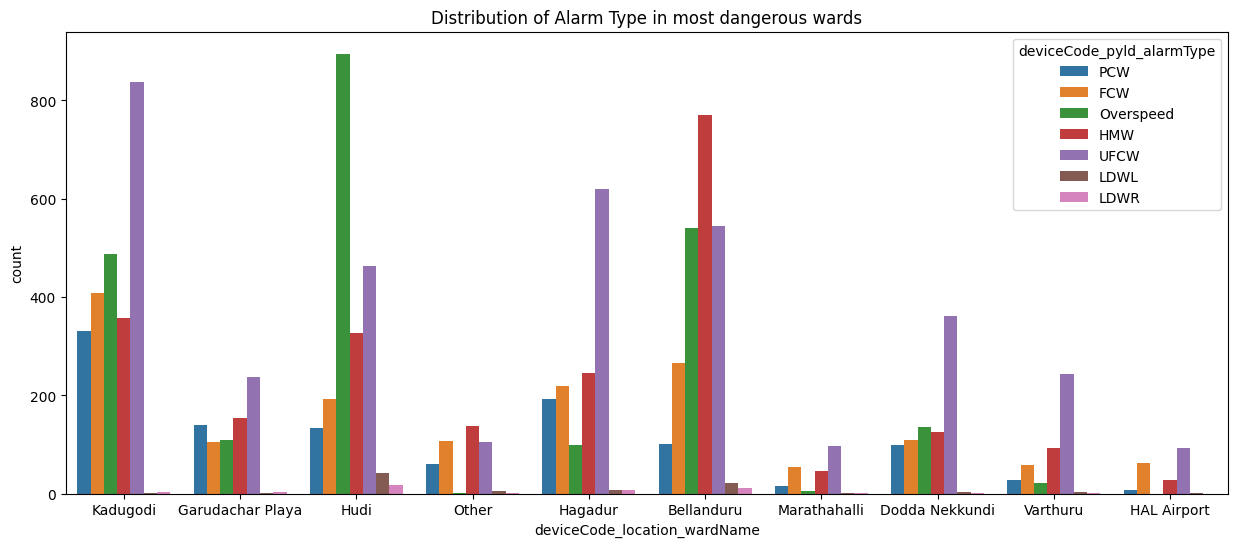

In [85]:
# countplot
# finding the alarm type in top alert area

plt.figure(figsize=[15,6])
sns.countplot(x=ward_top.deviceCode_location_wardName,hue=ward_top.deviceCode_pyld_alarmType)
plt.title('Distribution of Alarm Type in most dangerous wards')
plt.show()

### histogram and Q-Q plot

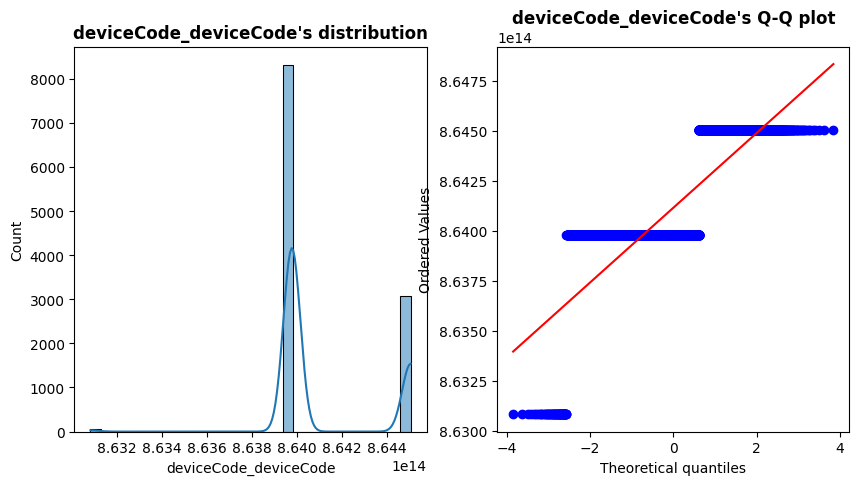

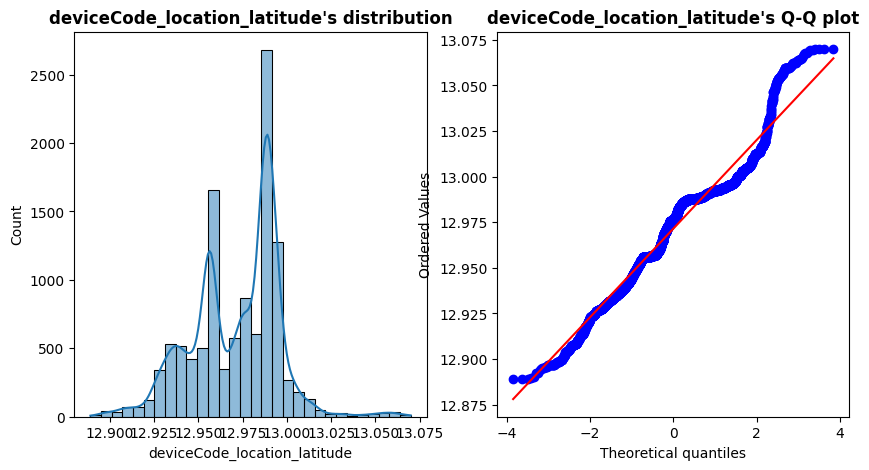

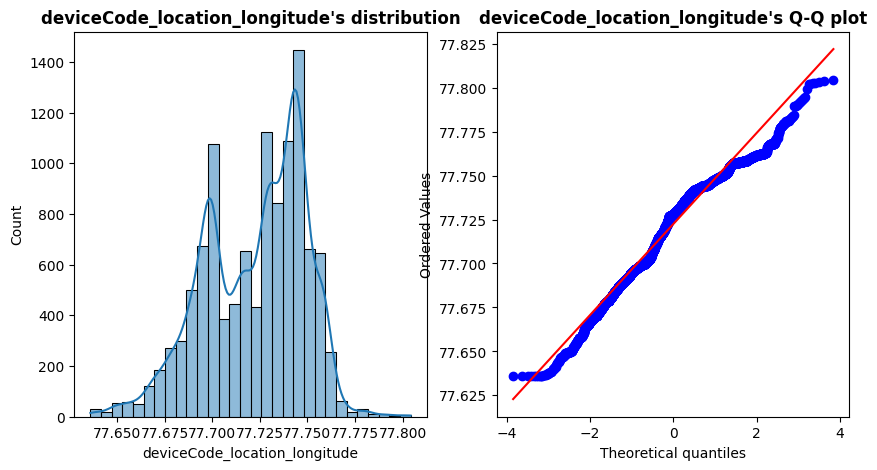

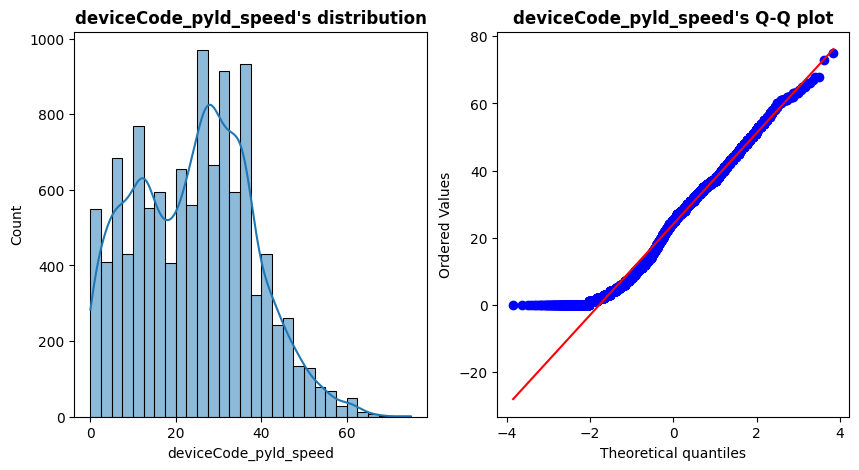

In [86]:
for feature in numerical_features:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.histplot(data=df, x=feature, kde=True, bins=30)
    plt.title(f"{feature}'s distribution", fontweight='bold')
    plt.subplot(122)
    stats.probplot(df[feature], dist='norm', plot=plt)
    plt.title(f"{feature}'s Q-Q plot", fontweight='bold')
    plt.show()

**Observstion:**
- "deviceCode location longitude" column data is approx normally distributed

## Multi-variate Analysis

In [109]:
# Summerizing the dataset
from skimpy import skim


skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 152276 │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃    ┃      ┃            ┃           ┃            ┃           ┃            ┃           ┃        ┃  │
│ ┃ e          ┃ NA ┃ NA % ┃ mean       ┃ sd        ┃ p0         ┃ p25       ┃ p75        ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ deviceCode │  0 │    0 │ 8600000000 │ 300000000 │ 8600000000 │ 860000000 │ 8600000000 │ 860000000 │     █▄ │  │
│ │ _deviceCod │    │      │      00000 │       000 │      00000 │    000000 │      00000 │    000000 │        │  │
│ │ deviceCode │  0 │    0 │         13 │     0.027 │         13 │        13 │         13 │        13 │    ▁█  │  │
│ │ _location_ │    │      │            │           │            │           │            │           │        │  │
│ │ deviceCode │  0 │    0 │         78 │      0.03 │         78 │        78 │         78 │        78 │    ▃█▁ │  │
│ │ _location_ │    │      │            │           │            │           │            │           │        │  │
│ │ deviceCode │  0 │    0 │         22 │        14 │          0 │        11 │         32 │        83 │  ██▇▂  │  │
│ │ _pyld_spee │    │      │            │           │            │           │            │           │        │  │
│ │ Year       │  0 │    0 │       2000 │         0 │       2000 │      2000 │       2000 │      2000 │     █  │  │
│ │ Date       │  0 │    0 │         14 │       7.7 │          1 │         7 │         19 │        31 │ ▅▇▅█▄▂ │  │
│ │ Hour       │  0 │    0 │         11 │       3.8 │          6 │         7 │         15 │        17 │ █▁ ▄▇▂ │  │
│ └────────────┴────┴──────┴────────────┴───────────┴────────────┴───────────┴────────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ deviceCode_location_                  │     0 │         0 │                      1.2 │              180000 │  │
│ │ deviceCode_pyld_alar                  │     0 │         0 │                      1.2 │              180000 │  │
│ │ deviceCode_time_reco                  │     0 │         0 │                      1.2 │              180000 │  │
│ │ Month                                 │     0 │         0 │                      1.2 │              180000 │  │
│ │ Weekday                               │     0 │     

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Thursday'),
  Text(1, 0, 'Friday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Monday'),
  Text(4, 0, 'Tuesday'),
  Text(5, 0, 'Wednesday'),
  Text(6, 0, 'Sunday')])

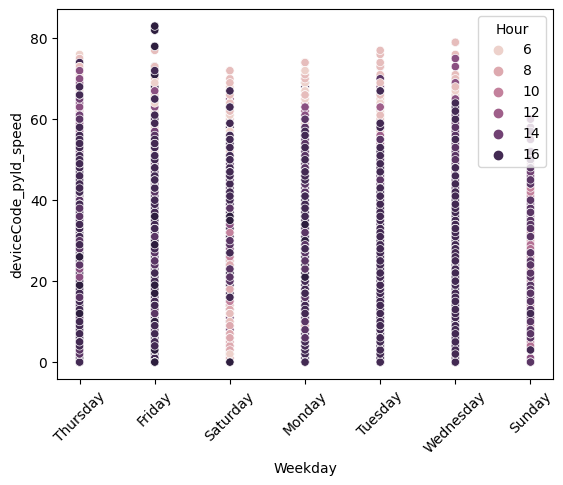

In [98]:
# Scatter plot

sns.scatterplot(data=df, x='Weekday', y='deviceCode_pyld_speed', hue='Hour')
plt.xticks(rotation=45)

**Observation:**
- On Friday and Wednesday people are driving with more speed which is mostly during morning 6-8 and evening 4-6.

# Heatmap

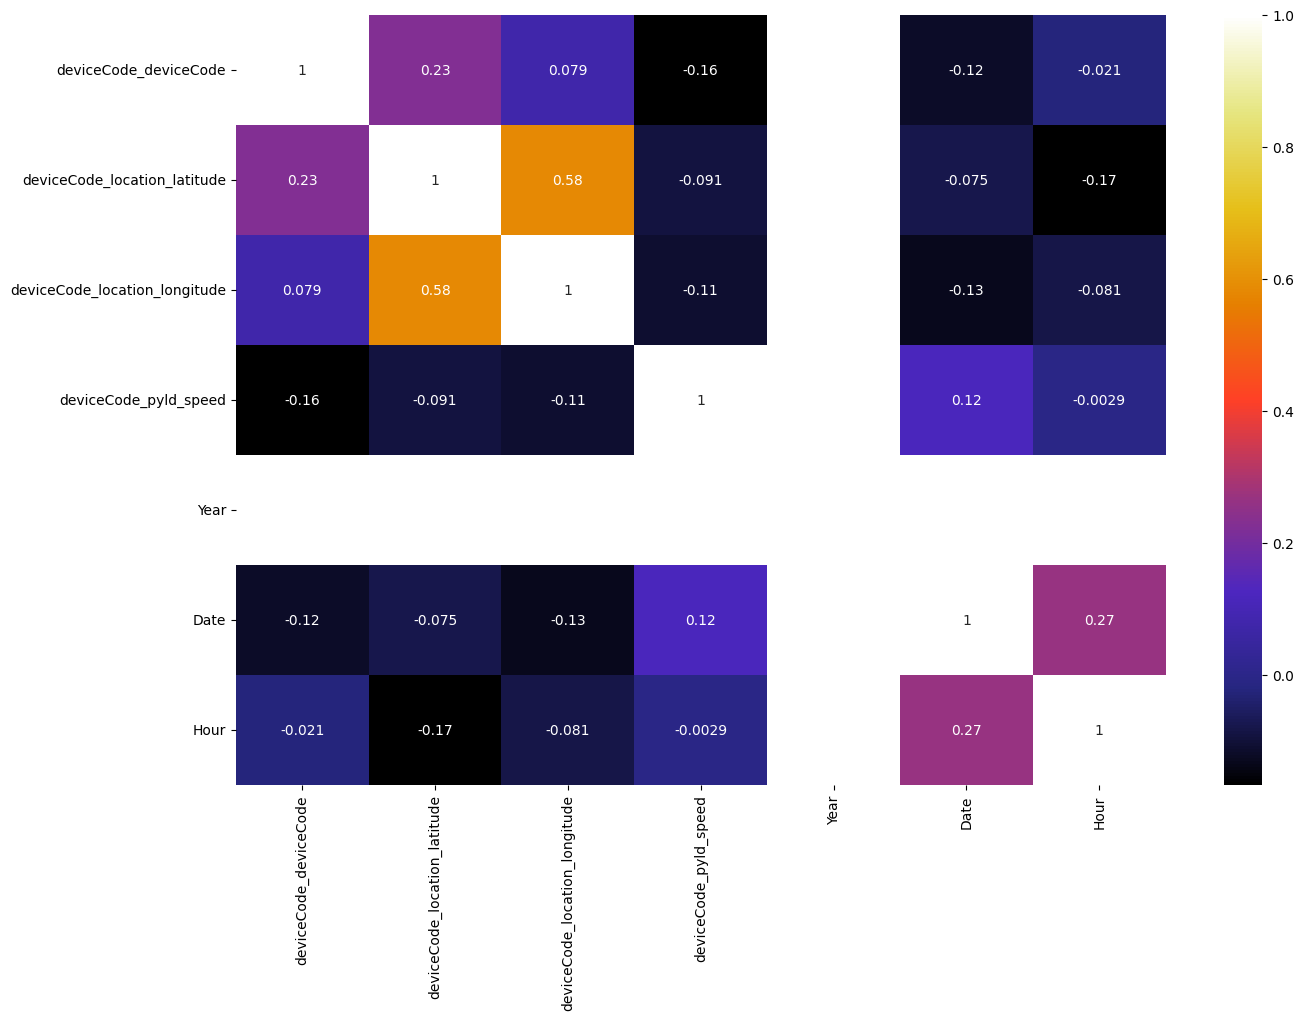

In [93]:
# Plotting 'Heatmap' to display correlation

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='CMRmap')
plt.show()

In [95]:
df.columns

Index(['deviceCode_deviceCode', 'deviceCode_location_latitude',
       'deviceCode_location_longitude', 'deviceCode_location_wardName',
       'deviceCode_pyld_alarmType', 'deviceCode_pyld_speed',
       'deviceCode_time_recordedTime_$date', 'Month', 'Year', 'Date',
       'Weekday', 'Hour'],
      dtype='object')

**Observation:**
- "deviceCode_location_latitude" and "deviceCode_location_longitude" are corelated a bit

### Pair plot

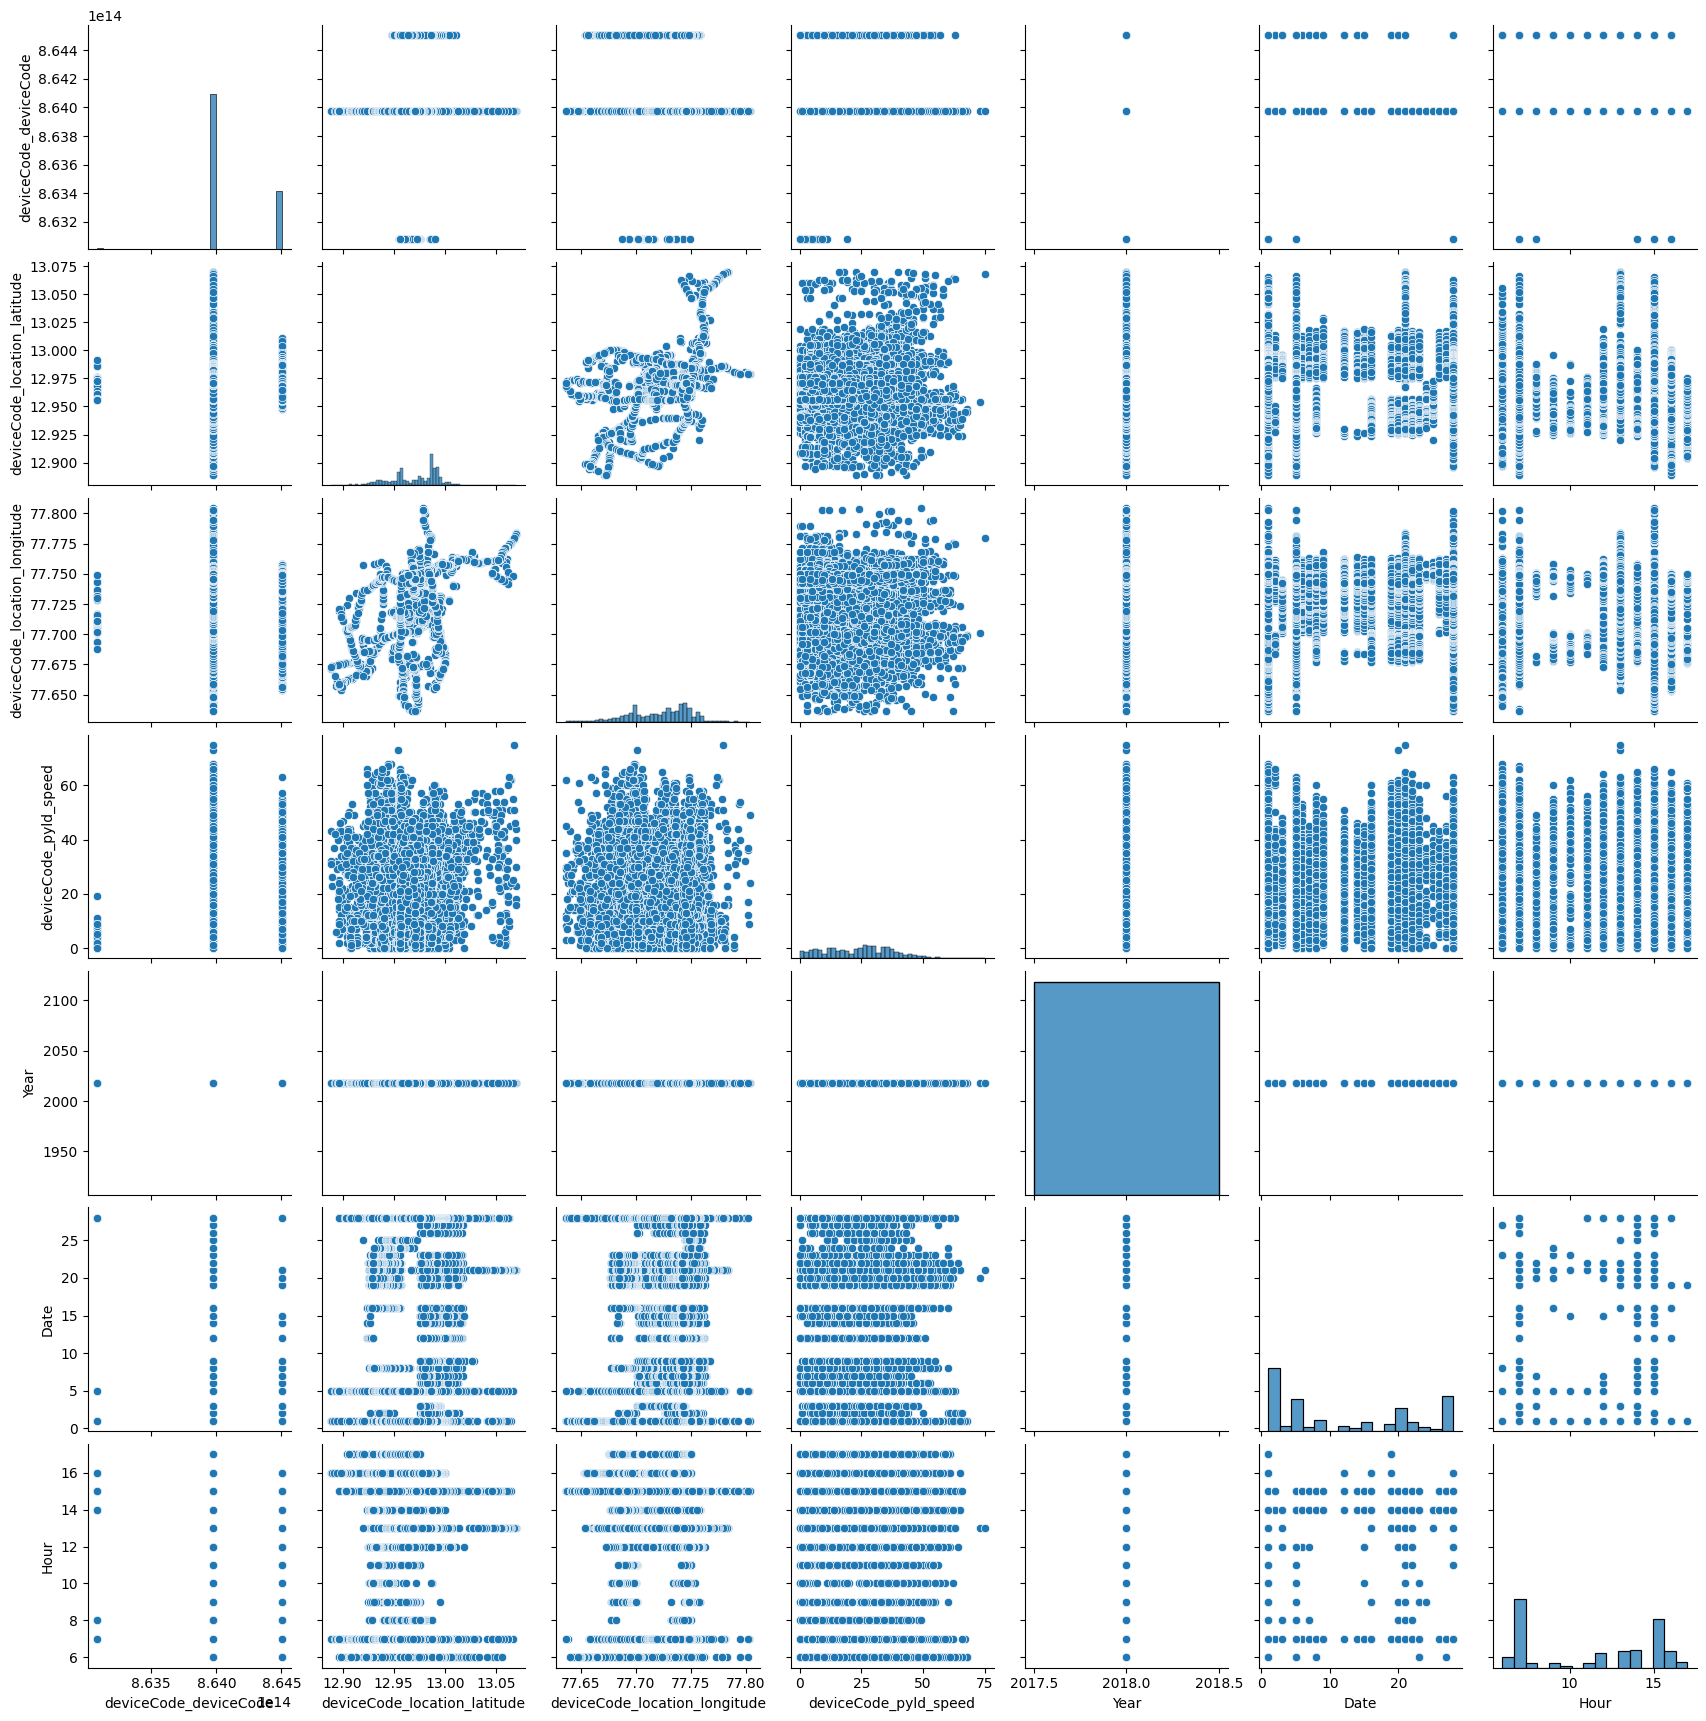

In [94]:
sns.pairplot(df)

**Observation:**
- No feature are highly corlated

# Thanks
Follow for more insights : https://github.com/saisubhasish